# Part 1: See Lab 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside = pd.read_csv('outsidedata.csv',skiprows=0)
inside = pd.read_csv('insidedata.csv',skiprows=0)

display(outside)
display(inside)

,time,PM1,PM2.5,PM10,BM680 Temp,BM680 Gas,BM680 Humidity,BM680 Pressure,BM680 Altitude
0,2 / 21 / 2025,0,1,1,33.391914,97268,100.000000,766.566308,2292.229678
1,2 / 21 / 2025,0,1,1,23.127266,14678,36.970113,1009.282017,33.088675
2,2 / 21 / 2025,0,1,1,23.161445,22550,36.477029,1009.282718,33.082814
3,2 / 21 / 2025,0,1,1,23.187422,33798,35.914106,1009.286989,33.047143
4,2 / 21 / 2025,0,1,1,23.206758,43284,35.381869,1009.293627,32.991700
...,...,...,...,...,...,...,...,...,...
295,2 / 21 / 2025,2,2,2,19.780391,301636,34.507801,1009.283918,33.072798
296,2 / 21 / 2025,2,2,2,19.775312,301111,34.489958,1009.281351,33.094237
297,2 / 21 / 2025,2,3,3,19.771602,301373,34.483827,1009.282772,33.082363
298,2 / 21 / 2025,2,3,3,19.768086,300069,34.471922,1009.275383,33.144084


,time,PM1,PM2.5,PM10,BM680 Temp,BM680 Gas,BM680 Humidity,BM680 Pressure,BM680 Altitude
0,2 / 21 / 2025,1,1,1,33.391914,38724,100.000000,766.566308,2292.229678
1,2 / 21 / 2025,0,0,0,24.136250,10703,36.792288,1010.270393,24.836849
2,2 / 21 / 2025,0,0,0,24.071797,16223,36.708903,1010.280842,24.749647
3,2 / 21 / 2025,0,0,0,24.031562,21225,36.598417,1010.283537,24.727156
4,2 / 21 / 2025,0,0,0,24.008711,27159,36.460202,1010.297098,24.613987
...,...,...,...,...,...,...,...,...,...
295,2 / 21 / 2025,0,1,1,24.185273,214065,34.358803,1010.290711,24.667284
296,2 / 21 / 2025,0,1,1,24.186250,212620,34.370553,1010.301434,24.577802
297,2 / 21 / 2025,0,1,1,24.186836,213012,34.370608,1010.296847,24.616080
298,2 / 21 / 2025,1,2,2,24.187812,212099,34.370701,1010.303896,24.557254


# Other Teams Data - Step 2 Onwards

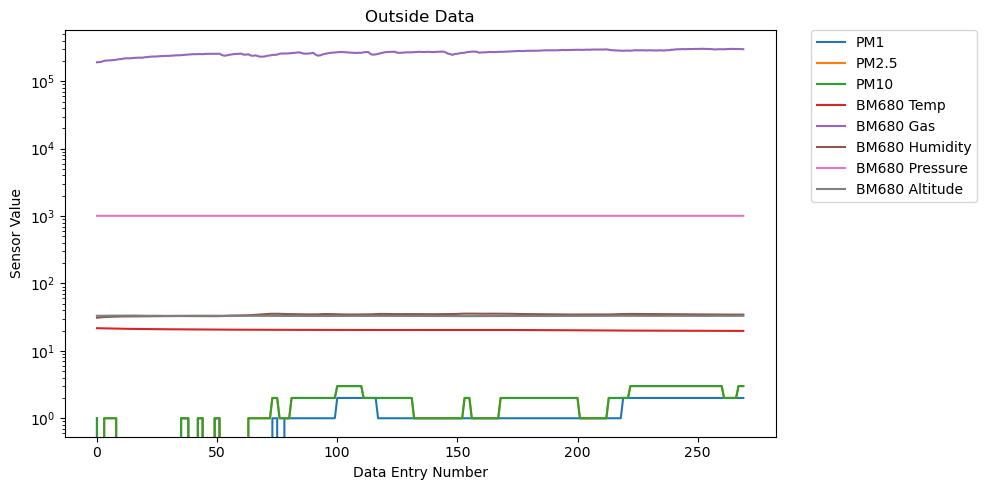

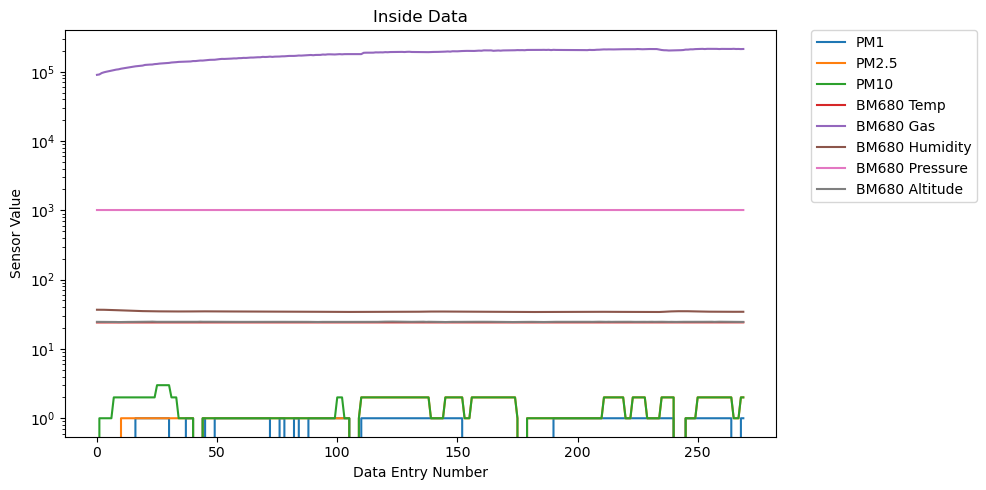

In [2]:
def plot_time_series(df, title):
    df = df.iloc[30:] 
    plt.figure(figsize=(10, 5))
    
    for col in df.columns:
        if col.lower() != 'time':
            plt.plot(range(len(df)), df[col], label=col) 

    plt.xlabel('Data Entry Number')
    plt.ylabel('Sensor Value')
    plt.yscale('log')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

plot_time_series(outside, 'Outside Data')
plot_time_series(inside, 'Inside Data')

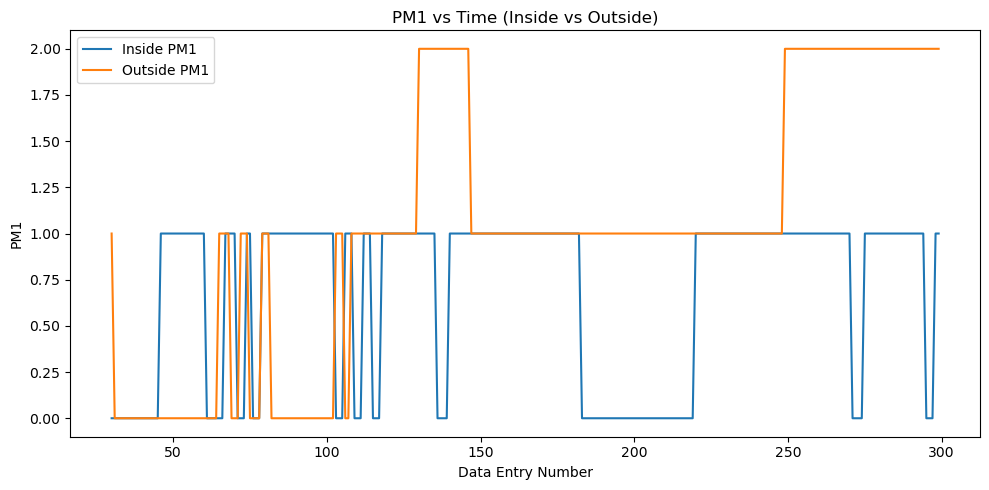

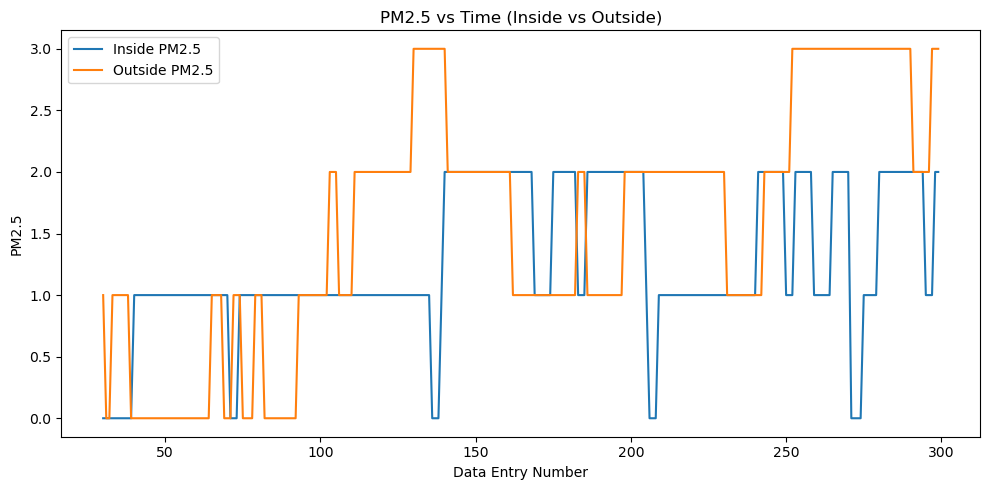

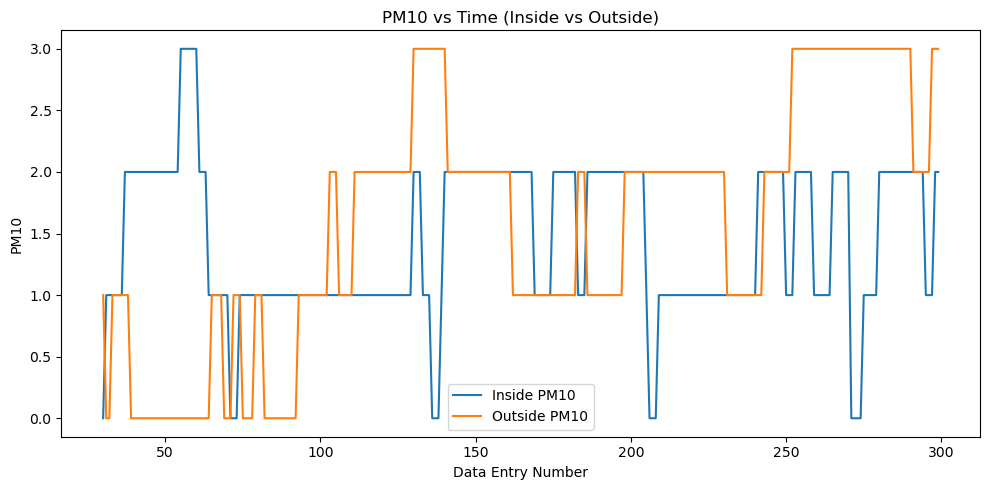

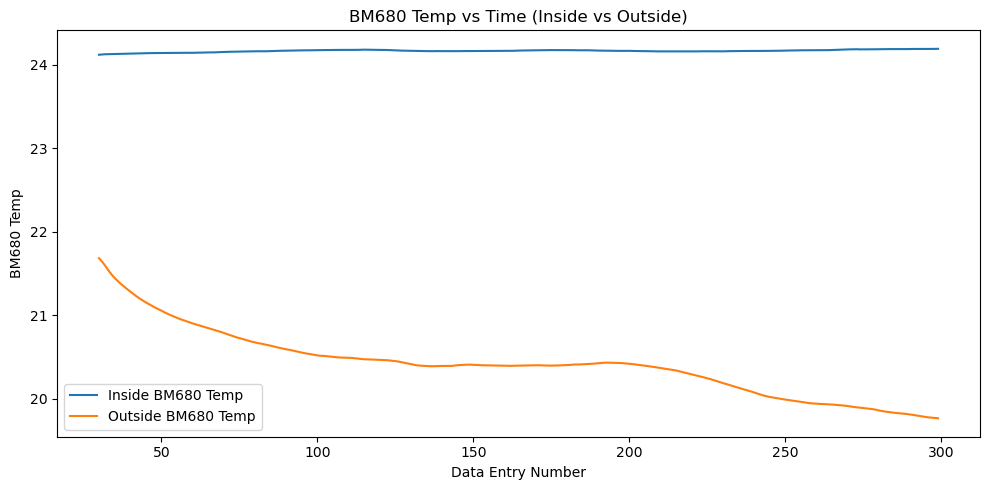

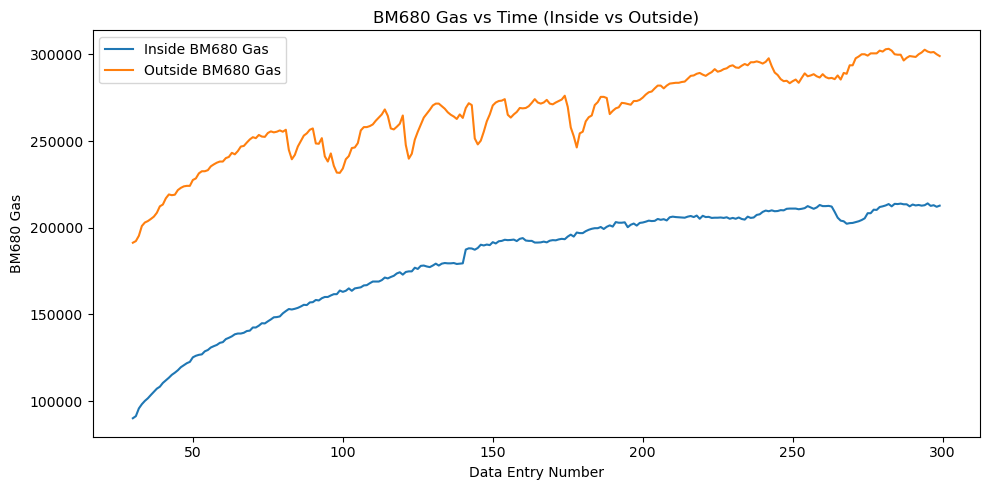

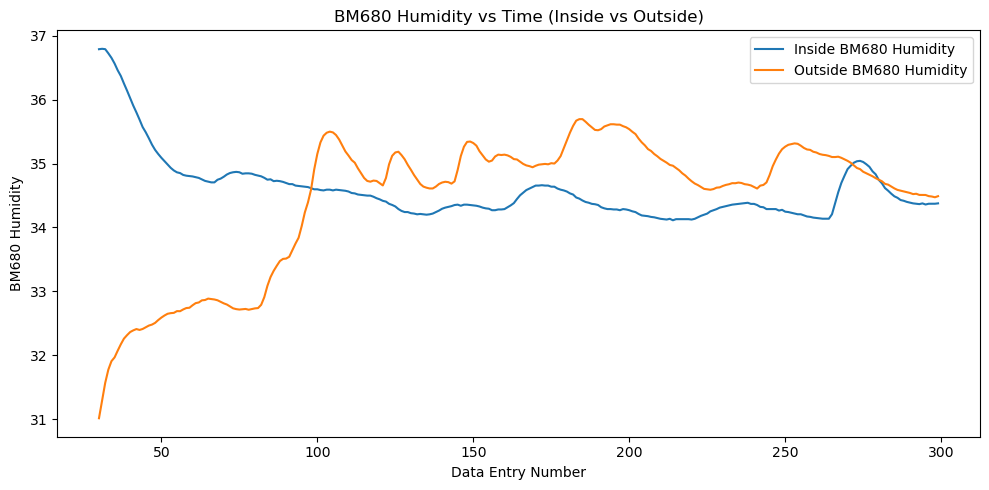

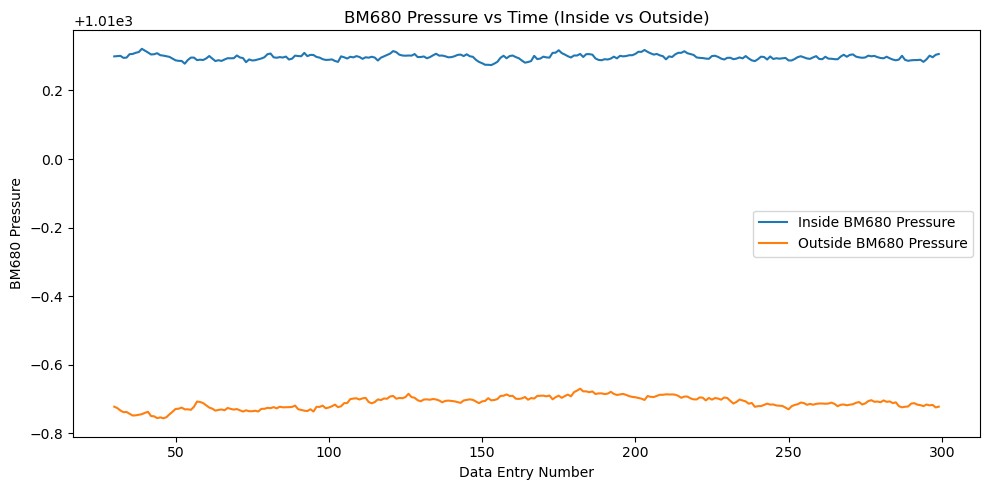

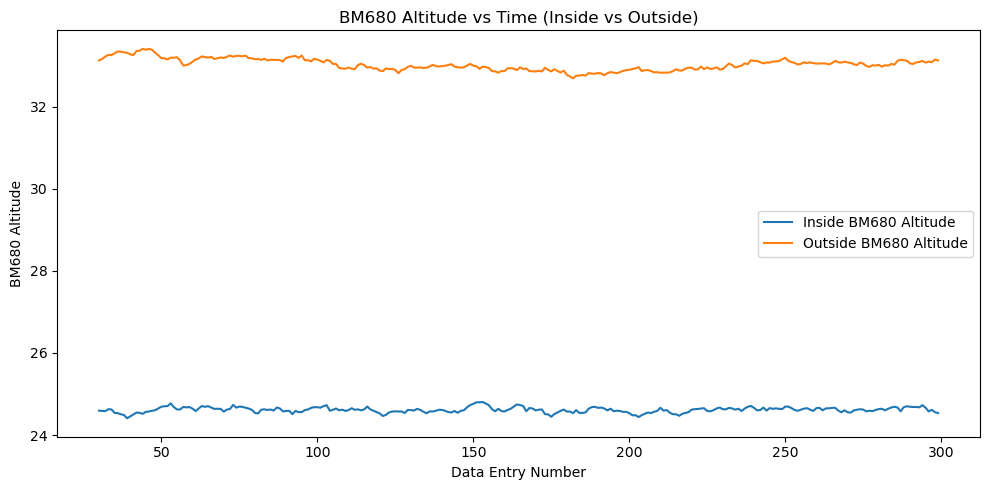

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

inside = inside.iloc[30:]
outside = outside.iloc[30:]

sensor_columns = [col for col in inside.columns if col != inside.columns[0]]

start_index = 30

for sensor in sensor_columns:
    plt.figure(figsize=(10, 5))
    
    plt.plot(range(start_index, len(inside) + start_index), inside[sensor], label=f'Inside {sensor}')
    plt.plot(range(start_index, len(outside) + start_index), outside[sensor], label=f'Outside {sensor}')
    
    plt.xlabel('Data Entry Number')
    plt.ylabel(sensor)
    plt.title(f'{sensor} vs Time (Inside vs Outside)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


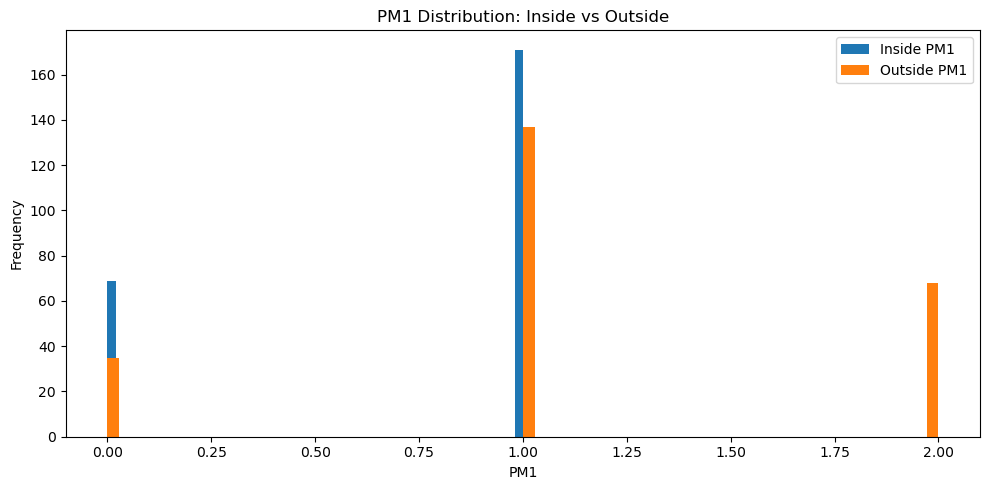

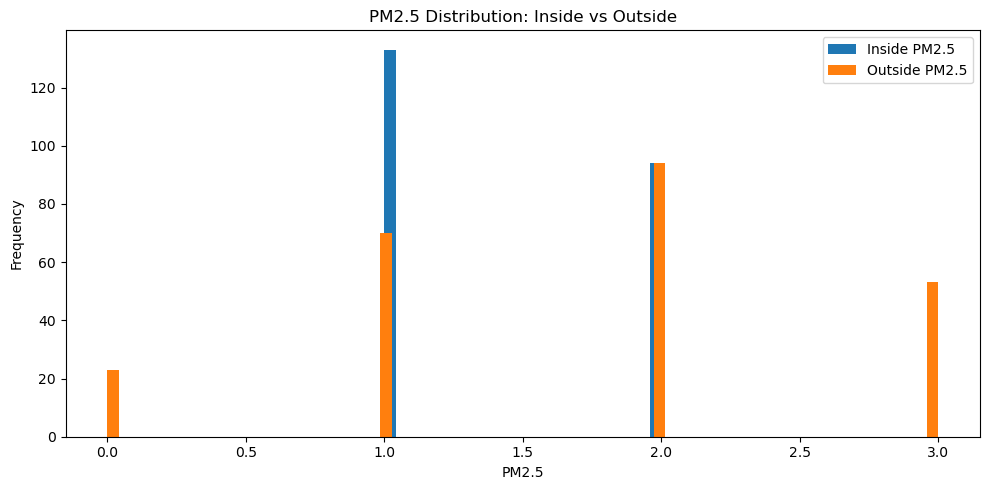

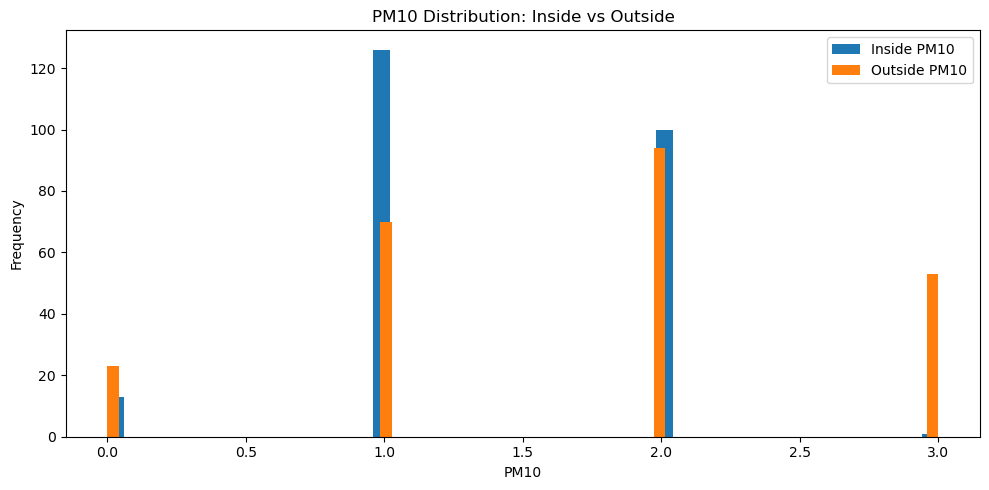

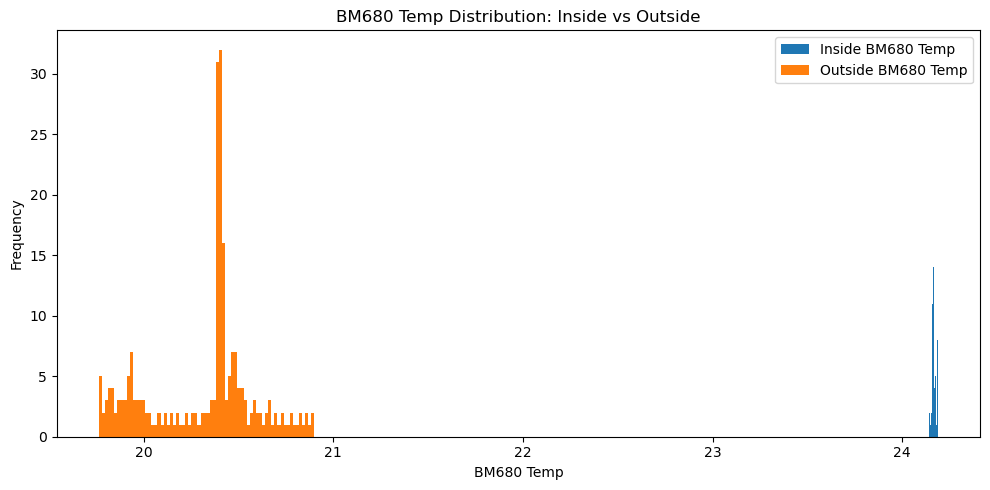

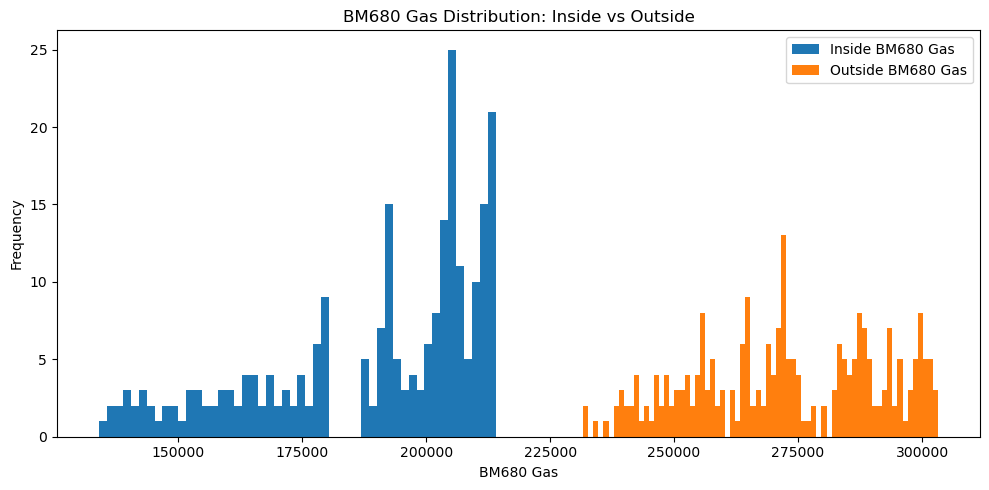

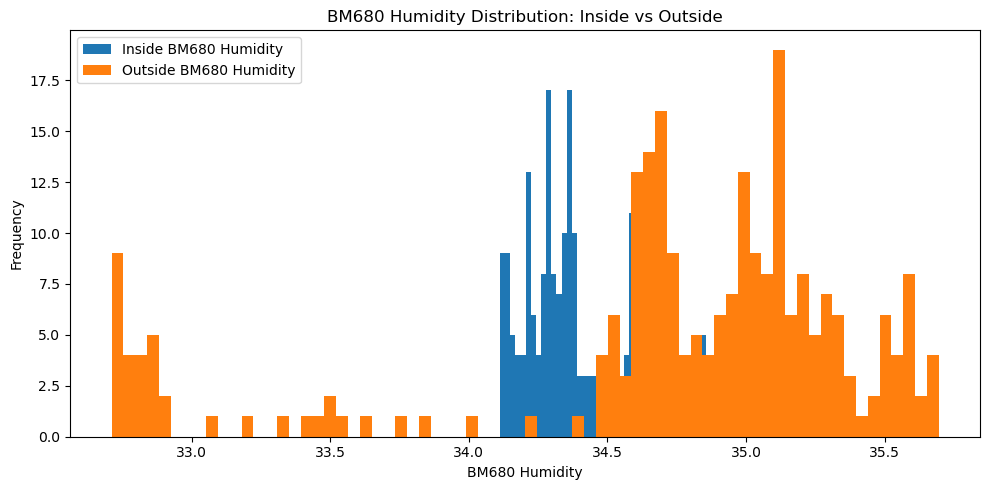

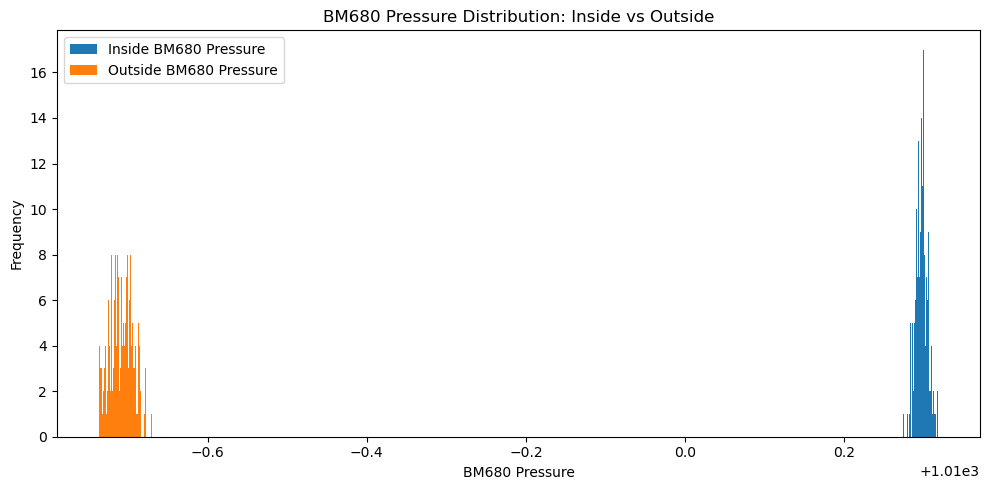

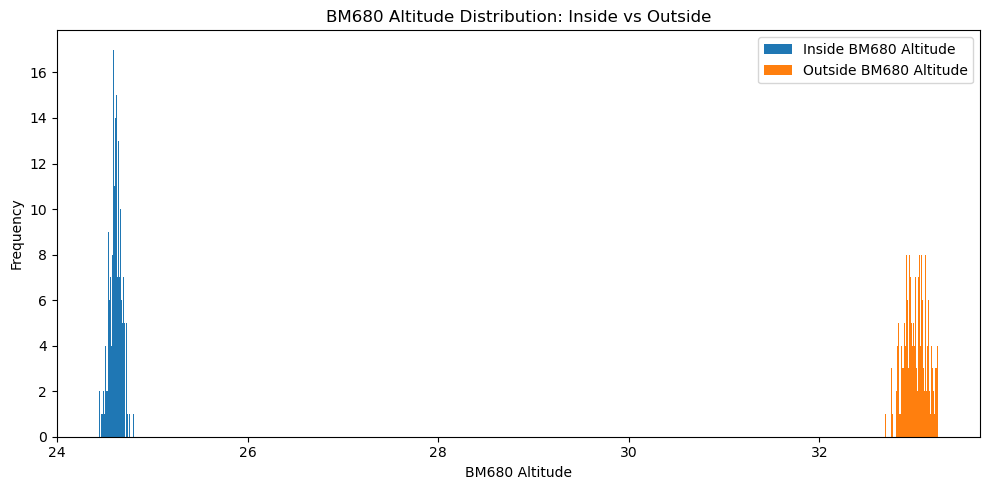

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

inside = inside.iloc[30:]
outside = outside.iloc[30:]

sensor_columns = [col for col in inside.columns if col != inside.columns[0]]

for sensor in sensor_columns:
    inside_data = inside[sensor].dropna()
    outside_data = outside[sensor].dropna()

    plt.figure(figsize=(10, 5))
    plt.hist(inside_data, bins=50, label=f'Inside {sensor}')
    plt.hist(outside_data, bins=70, label=f'Outside {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.title(f'{sensor} Distribution: Inside vs Outside')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [5]:
inside = inside.iloc[30:]
outside = outside.iloc[30:]

sensor_columns = [col for col in inside.columns if col != inside.columns[0]]  # Exclude the first column

for sensor in sensor_columns:
    inside_data = inside[sensor].dropna()
    outside_data = outside[sensor].dropna()

    mu_in = np.mean(inside_data)
    mu_out = np.mean(outside_data)
    
    sigma_in = np.std(inside_data, ddof=1)
    sigma_out = np.std(outside_data, ddof=1)
    
    n_in = len(inside_data)
    n_out = len(outside_data)
    
    SEM_in = sigma_in / np.sqrt(n_in)
    SEM_out = sigma_out / np.sqrt(n_out)
    
    SE_delta = np.sqrt(SEM_in**2 + SEM_out**2)
    
    delta = abs(mu_in - mu_out)
    
    num_standard_devs = delta / SE_delta
    
    print(f"Sensor: {sensor}")
    print(f"Inside Mean: {mu_in:.2f}, Inside Std Dev: {sigma_in:.2f}, SEM: {SEM_in:.2f}")
    print(f"Outside Mean: {mu_out:.2f}, Outside Std Dev: {sigma_out:.2f}, SEM: {SEM_out:.2f}")
    print(f"Difference in Means: {delta:.2f}, Combined Standard Error: {SE_delta:.2f}")
    print(f"Number of Standard Deviations between Means: {num_standard_devs:.2f}")
    
    if num_standard_devs > 3:
        print(f"For sensor {sensor}, the means are separated by more than 3σ; statistically significant difference.")
    else:
        print(f"For sensor {sensor}, the means are not separated by more than 3σ; no significant difference.")
    print("\n")


Sensor: PM1
Inside Mean: 0.73, Inside Std Dev: 0.45, SEM: 0.03
Outside Mean: 1.25, Outside Std Dev: 0.58, SEM: 0.04
Difference in Means: 0.52, Combined Standard Error: 0.05
Number of Standard Deviations between Means: 10.41
For sensor PM1, the means are separated by more than 3σ; statistically significant difference.


Sensor: PM2.5
Inside Mean: 1.40, Inside Std Dev: 0.58, SEM: 0.04
Outside Mean: 1.94, Outside Std Dev: 0.77, SEM: 0.05
Difference in Means: 0.54, Combined Standard Error: 0.07
Number of Standard Deviations between Means: 8.08
For sensor PM2.5, the means are separated by more than 3σ; statistically significant difference.


Sensor: PM10
Inside Mean: 1.41, Inside Std Dev: 0.58, SEM: 0.04
Outside Mean: 1.94, Outside Std Dev: 0.77, SEM: 0.05
Difference in Means: 0.52, Combined Standard Error: 0.07
Number of Standard Deviations between Means: 7.86
For sensor PM10, the means are separated by more than 3σ; statistically significant difference.


Sensor: BM680 Temp
Inside Mean: 2

Almost all the distribution graphs look to be well described as a gaussian distribution, except fot the gas distribiutions on the inside and the humidity distribution on the outside. 

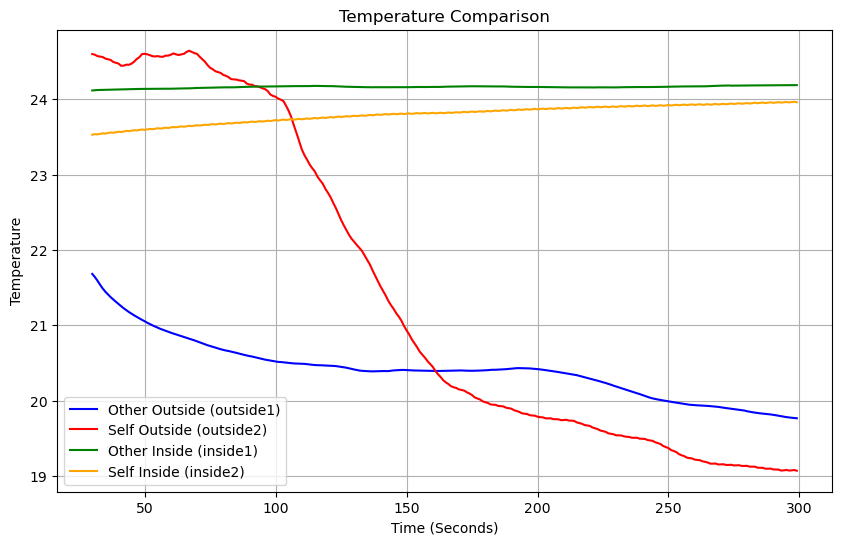

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)
outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))  
data_outside1 = outside1.iloc[30:, 4] 

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 1]  

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))
data_inside1 = inside1.iloc[30:, 4]  

time_inside2 = np.arange(30, len(inside2))
data_inside2 = inside2.iloc[30:, 1] 
inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1] 
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')

plt.legend()
plt.grid(True)

plt.show()


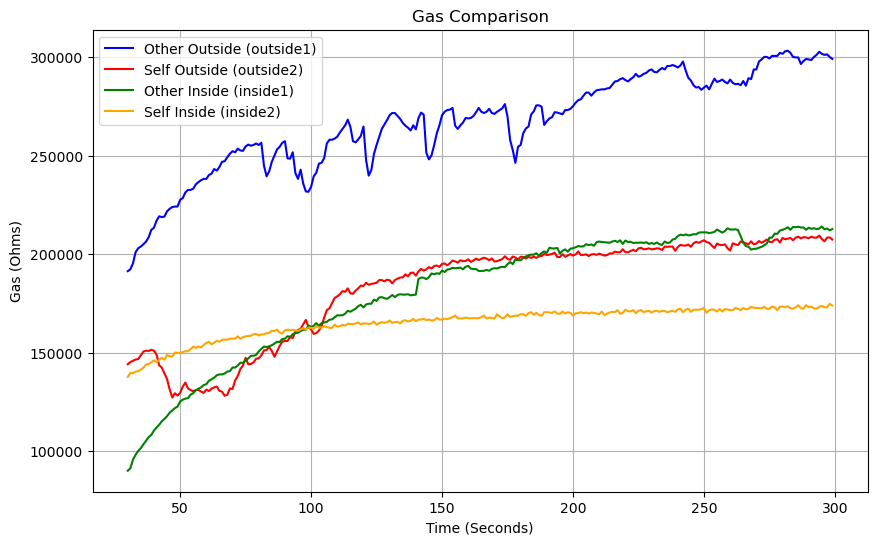

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))
data_outside1 = outside1.iloc[30:, 5]  
time_outside2 = np.arange(30, len(outside2))  
data_outside2 = outside2.iloc[30:, 2] 
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))
data_inside1 = inside1.iloc[30:, 5]  

time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 2]  
inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside)) 
data_inside = inside.iloc[30:, 1]  

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Gas (Ohms)')
plt.title('Gas Comparison')

plt.legend()
plt.grid(True)

plt.show()


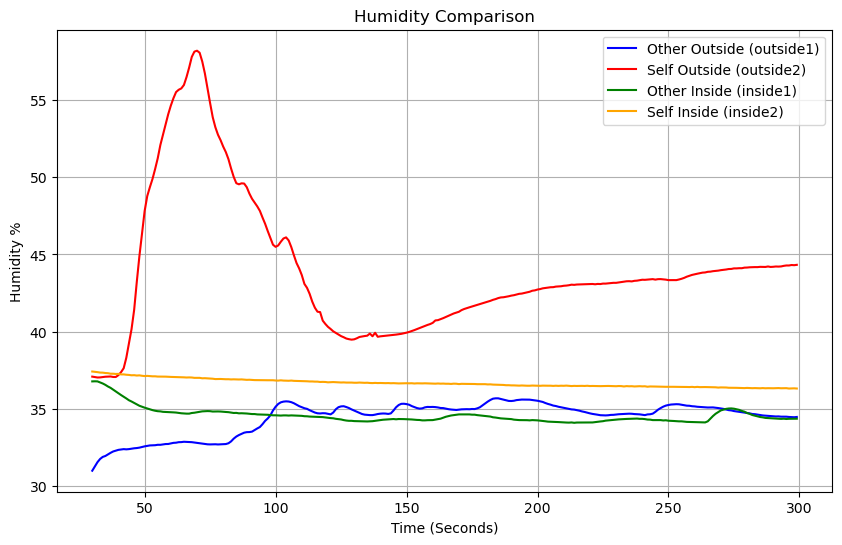

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 6] 
time_outside2 = np.arange(30, len(outside2))
data_outside2 = outside2.iloc[30:, 3]

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 6] 
time_inside2 = np.arange(30, len(inside2)) 
data_inside2 = inside2.iloc[30:, 3]

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1] 

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Humidity %')
plt.title('Humidity Comparison')

plt.legend()
plt.grid(True)

plt.show()


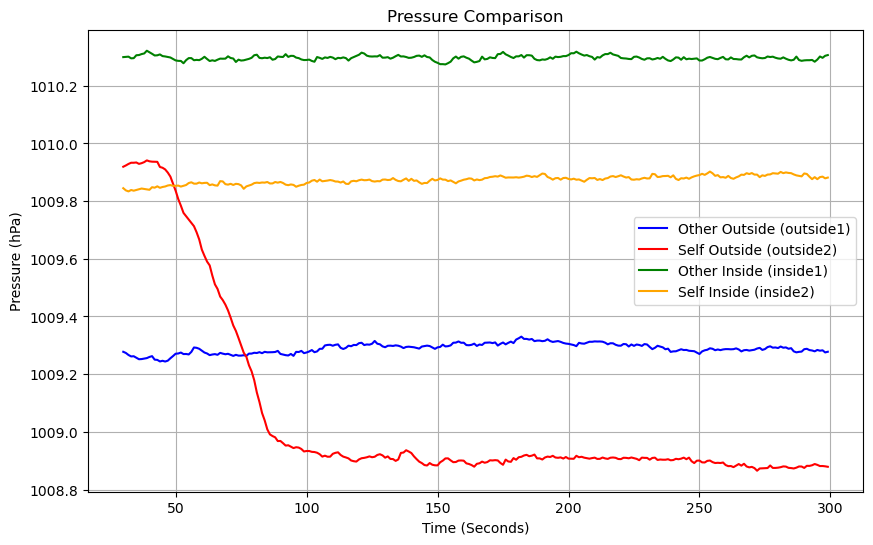

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 7] 

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 4]  

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 7] 

time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 4]  

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside)) 
data_inside = inside.iloc[30:, 1]

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Comparison')

plt.legend()
plt.grid(True)

plt.show()


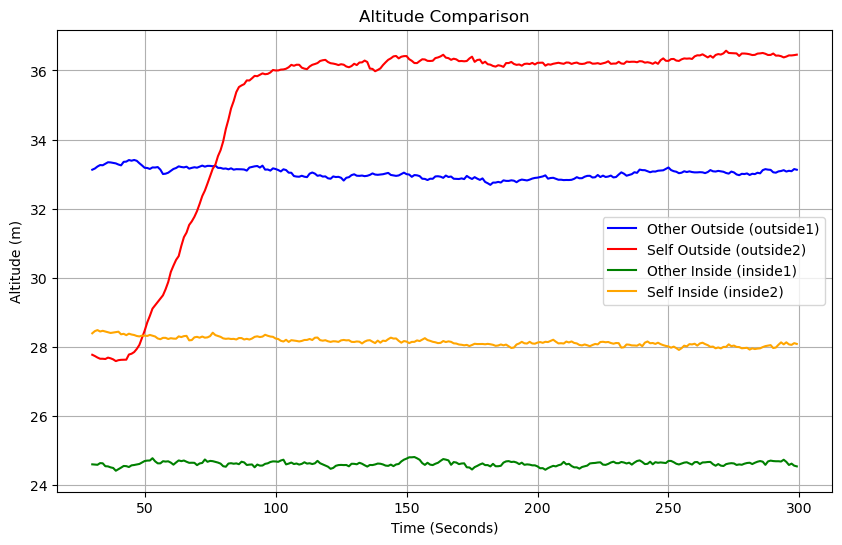

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 8]

time_outside2 = np.arange(30, len(outside2))
data_outside2 = outside2.iloc[30:, 5]  
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)


time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 8]  
time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 5] 

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside)) 
data_inside = inside.iloc[30:, 1] 
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Altitude (m)')
plt.title('Altitude Comparison')

plt.legend()
plt.grid(True)

plt.show()


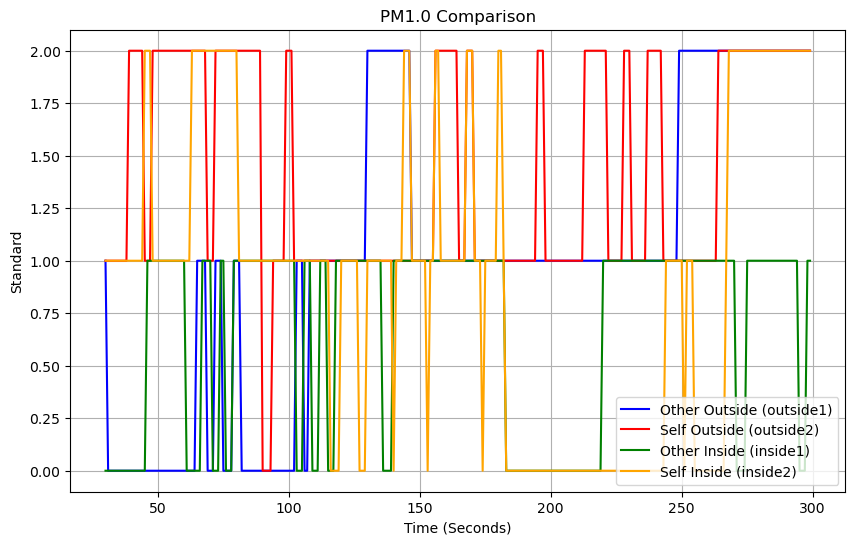

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 1]  

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 6]
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 1]
time_inside2 = np.arange(30, len(inside2)) 
data_inside2 = inside2.iloc[30:, 6]  

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1]  
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Standard')
plt.title('PM1.0 Comparison')

plt.legend()
plt.grid(True)

plt.show()


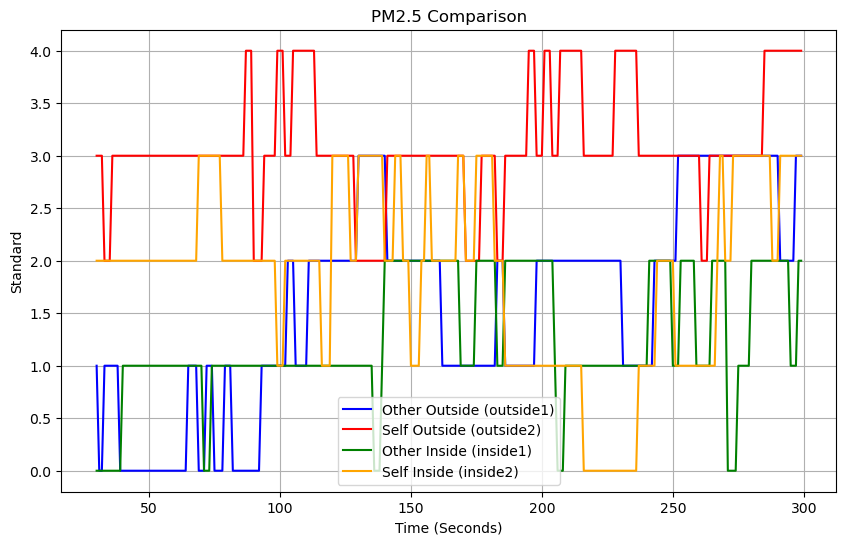

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))
data_outside1 = outside1.iloc[30:, 2] 

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 7]  

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)


time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 2] 

time_inside2 = np.arange(30, len(inside2)) 
data_inside2 = inside2.iloc[30:, 7] 
inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1]
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Standard')
plt.title('PM2.5 Comparison')

plt.legend()
plt.grid(True)

plt.show()


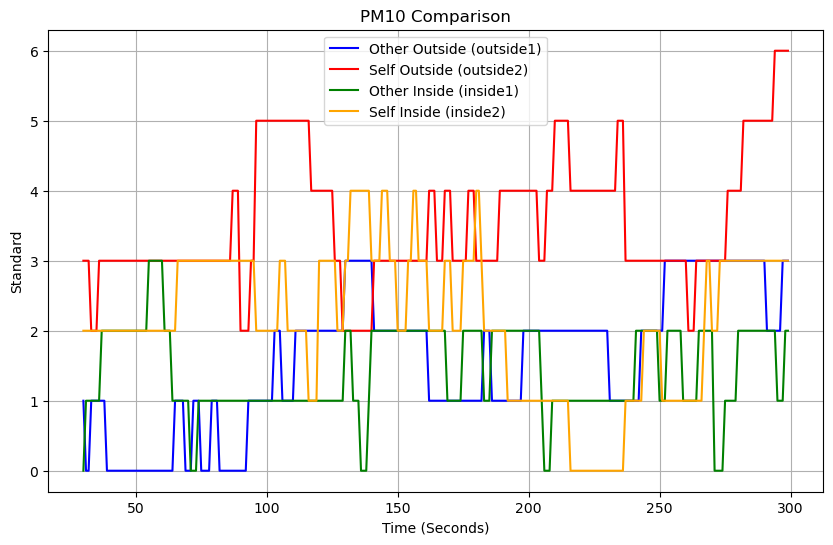

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))  
data_outside1 = outside1.iloc[30:, 3]  
time_outside2 = np.arange(30, len(outside2))  
data_outside2 = outside2.iloc[30:, 8]  
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 3]  
time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 8]  

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1]  

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Standard')
plt.title('PM10 Comparison')

plt.legend()
plt.grid(True)

plt.show()


Examining all the graphs, it seems that our sensors are similar in their data readinds, but our own outside measurements seems to be off. This could be due to the time it took to get upstairs and outside. We removed the first 30 seconds of all the data to see if we could eliminate some of that human error but it seems like it wasn't enough.  

# Step 3: More Locations

Outside 3 is the additional data taken by our sensor on top of Etcheverry. 

,Current Time,Temperature (C),Gas (ohm),Humidity (%),Pressure (hPa),Altitude (m),PM1.0 (standard),PM2.5 (standard),PM10 (standard),PM1.0 (env),PM2.5 (env),PM10 (env),Particles >0.3um,Particles >0.5um,Particles >1.0um,Particles >2.5um,Particles >5.0um,Particles >10um
0,2025-02-28 16:12:37,22.826875,186353,43.742312,1000.230925,108.960954,10,15,16,10,15,16,1869,532,75,10,2,0
1,2025-02-28 16:12:38,22.791914,185848,43.774702,1000.224092,109.018437,10,15,16,10,15,16,1869,532,75,10,2,0
2,2025-02-28 16:12:39,22.765937,188364,43.826300,1000.212311,109.117558,10,15,16,10,15,16,1929,544,80,11,2,0
3,2025-02-28 16:12:40,22.741523,186249,43.865962,1000.208322,109.151118,10,15,16,10,15,16,1929,544,80,11,2,0
4,2025-02-28 16:12:41,22.706563,185440,43.916560,1000.206763,109.164238,10,15,16,10,15,16,1929,544,80,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2025-02-28 16:17:34,22.464961,211272,44.563279,1000.471869,106.934009,6,10,10,6,10,10,1428,386,72,5,0,0
345,2025-02-28 16:17:35,22.492109,214135,44.554223,1000.469727,106.952032,7,11,11,7,11,11,1428,386,72,5,0,0
346,2025-02-28 16:17:36,22.518477,210068,44.557249,1000.457521,107.054704,7,11,11,7,11,11,1428,386,72,5,0,0
347,2025-02-28 16:17:36,22.561250,209935,44.592594,1000.452308,107.098554,7,10,10,7,10,10,1419,381,66,4,0,0


,Current Time,Temperature (C),Gas (ohm),Humidity (%),Pressure (hPa),Altitude (m),PM1.0 (standard),PM2.5 (standard),PM10 (standard),PM1.0 (env),PM2.5 (env),PM10 (env),Particles >0.3um,Particles >0.5um,Particles >1.0um,Particles >2.5um,Particles >5.0um,Particles >10um
140,2025-02-21 16:29:16,21.519063,189105,39.705821,1008.926477,36.058633,1,2,2,1,2,2,339,76,17,2,0,0
141,2025-02-21 16:29:17,21.459297,191301,39.723425,1008.914951,36.154925,1,3,3,1,3,3,378,94,25,2,0,0
142,2025-02-21 16:29:18,21.396602,192532,39.734774,1008.905422,36.234533,1,3,3,1,3,3,378,94,25,2,0,0
143,2025-02-21 16:29:18,21.326094,191635,39.757219,1008.896657,36.307763,1,3,3,1,3,3,378,94,25,2,0,0
144,2025-02-21 16:29:19,21.269258,192307,39.769179,1008.891666,36.349465,1,3,3,1,3,3,390,101,24,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2025-02-21 16:34:12,18.439961,217590,46.204851,1008.885189,36.403582,1,3,4,1,3,4,414,124,32,3,2,2
485,2025-02-21 16:34:13,18.427852,215596,46.184975,1008.892392,36.343398,1,3,4,1,3,4,414,124,32,3,2,2
486,2025-02-21 16:34:14,18.428242,216731,46.191185,1008.889622,36.366541,1,3,4,1,3,4,438,125,33,3,2,2
487,2025-02-21 16:34:15,18.430781,218892,46.160648,1008.893849,36.331225,1,3,4,1,3,4,438,125,33,3,2,2


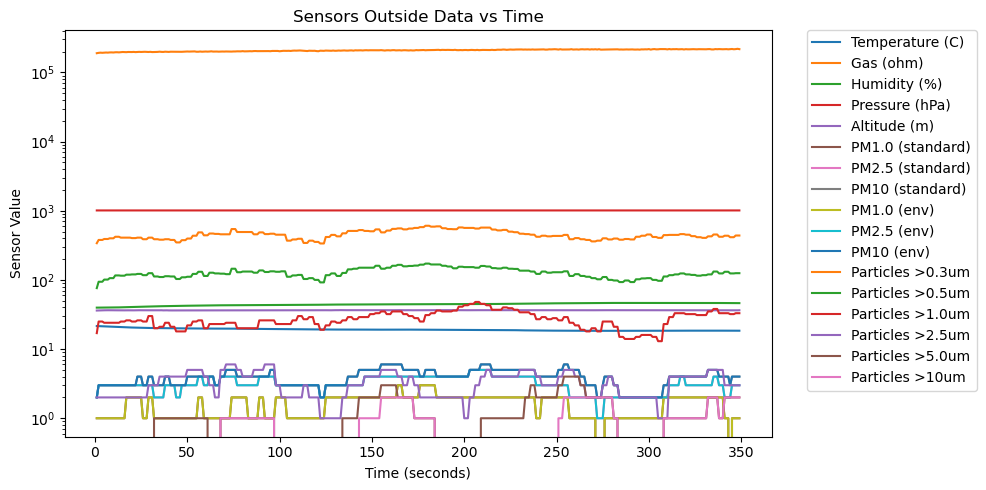

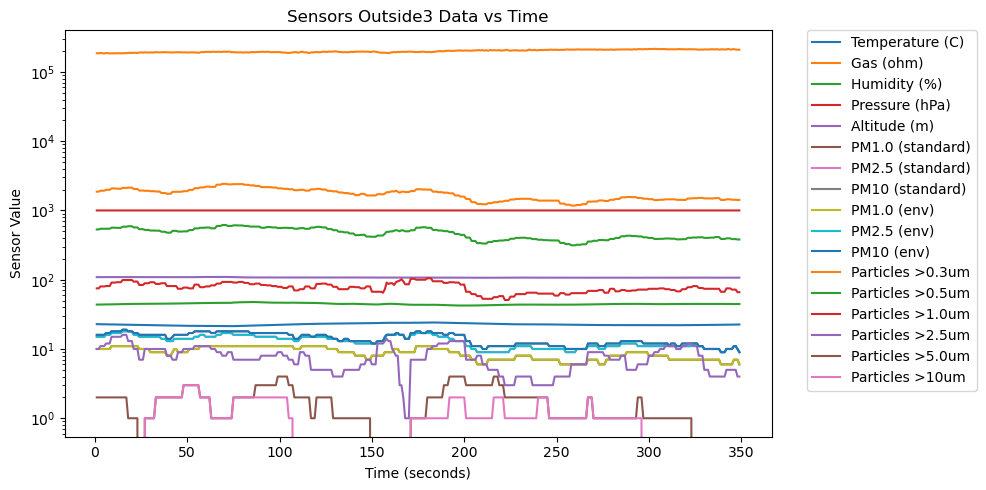

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside = pd.read_csv('SensorsOutside.csv', skiprows=1)
outside3 = pd.read_csv('Sensors2.csv', skiprows=1)

excess_entries = len(outside) - len(outside3)
outside = outside.iloc[excess_entries:]  

display(outside3)
display(outside)

def plot_time_series(df, title):
    plt.figure(figsize=(10, 5))
    time_x_axis = np.arange(1, len(df) + 1)
    for col in df.columns:
        if col.lower() != 'current time':
            plt.plot(time_x_axis, df[col], label=col)
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Sensor Value')
    plt.yscale('log')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

plot_time_series(outside, 'Sensors Outside Data vs Time')
plot_time_series(outside3, 'Sensors Outside3 Data vs Time')


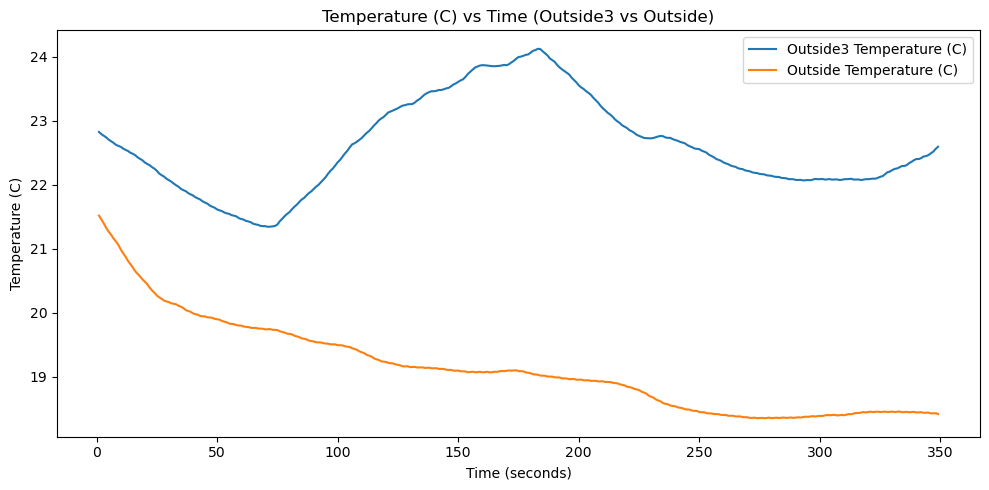

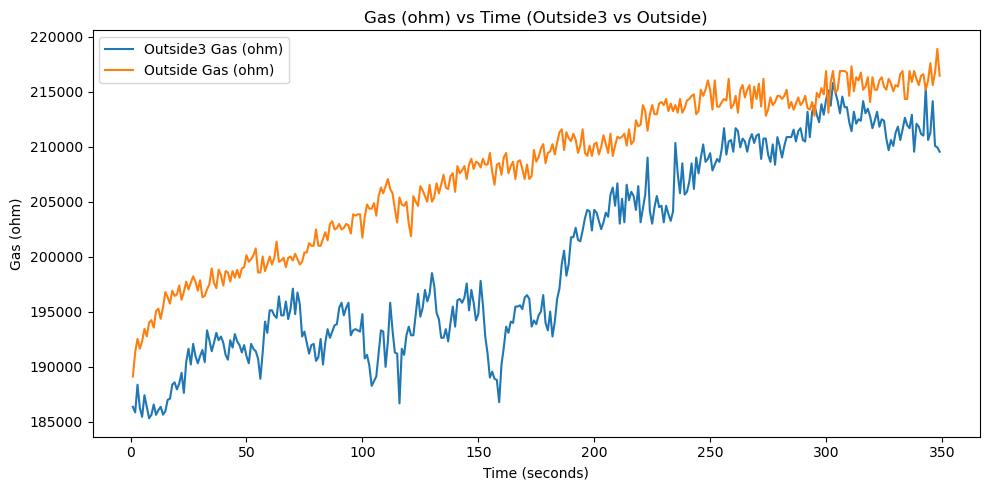

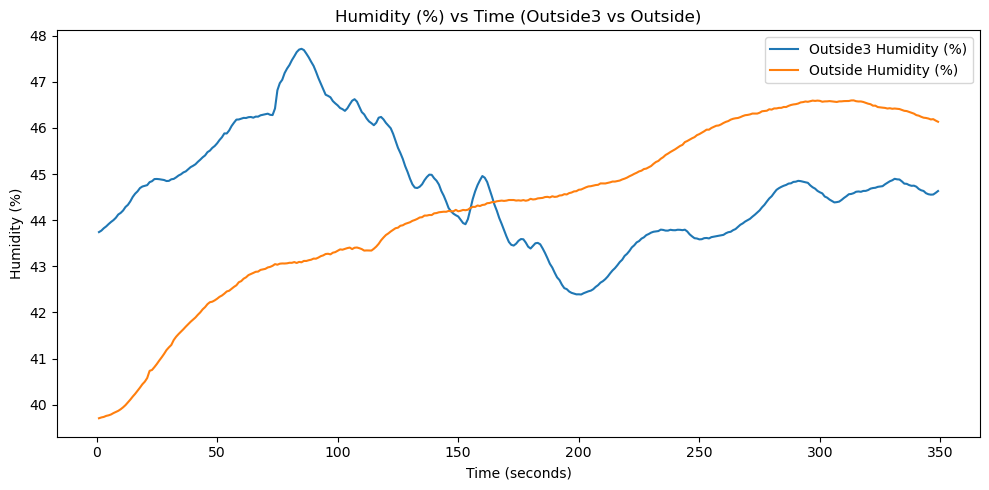

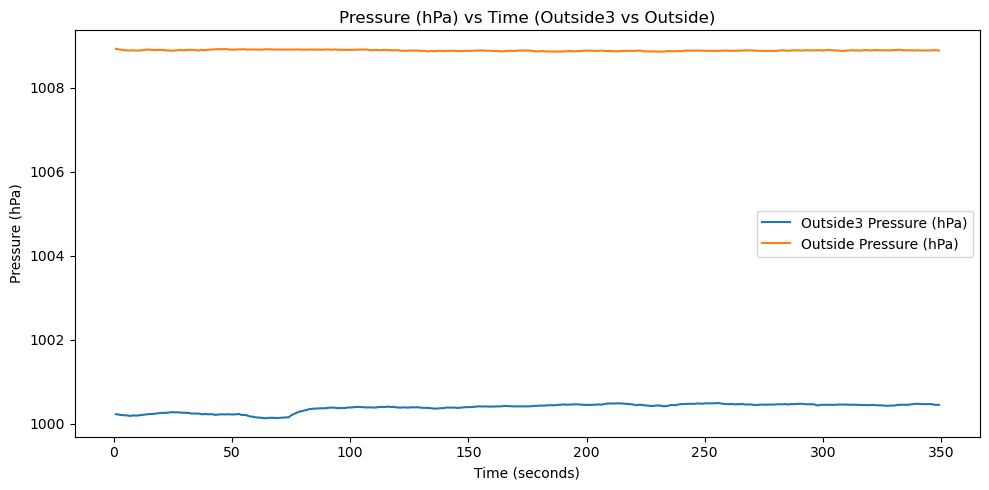

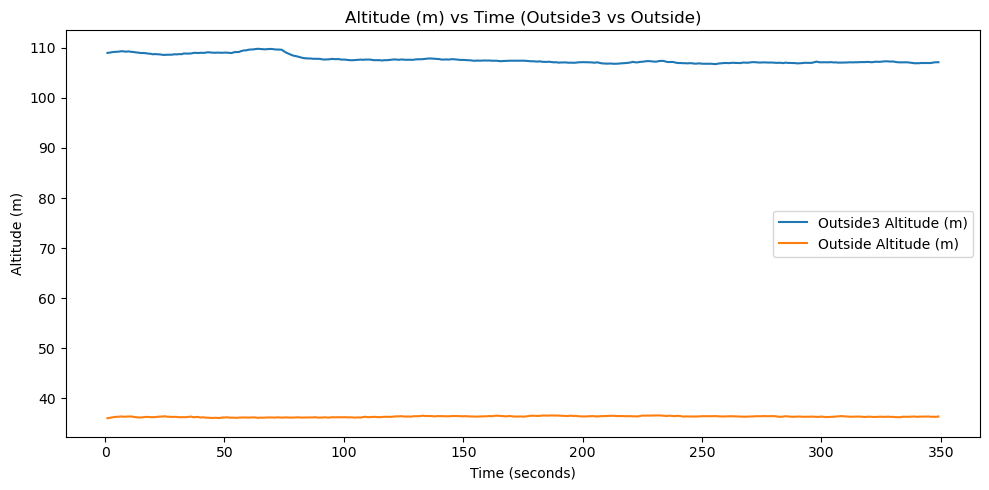

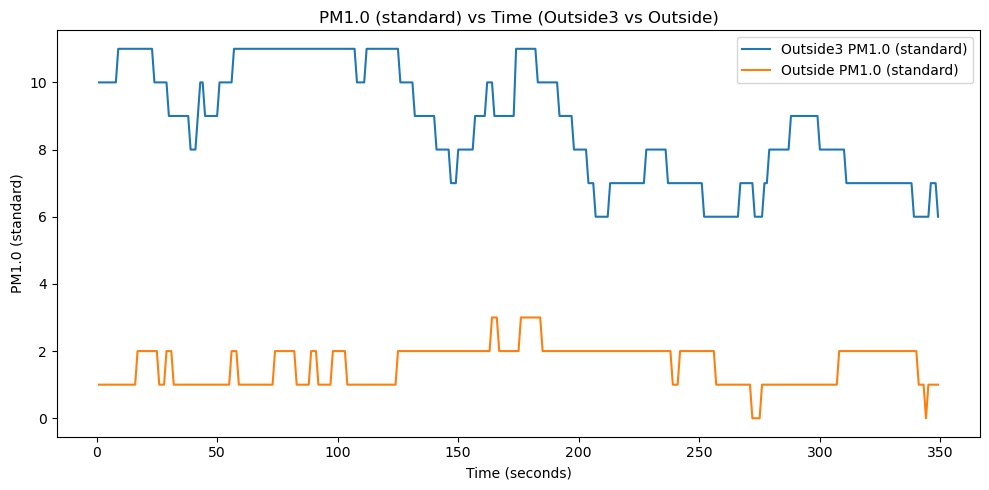

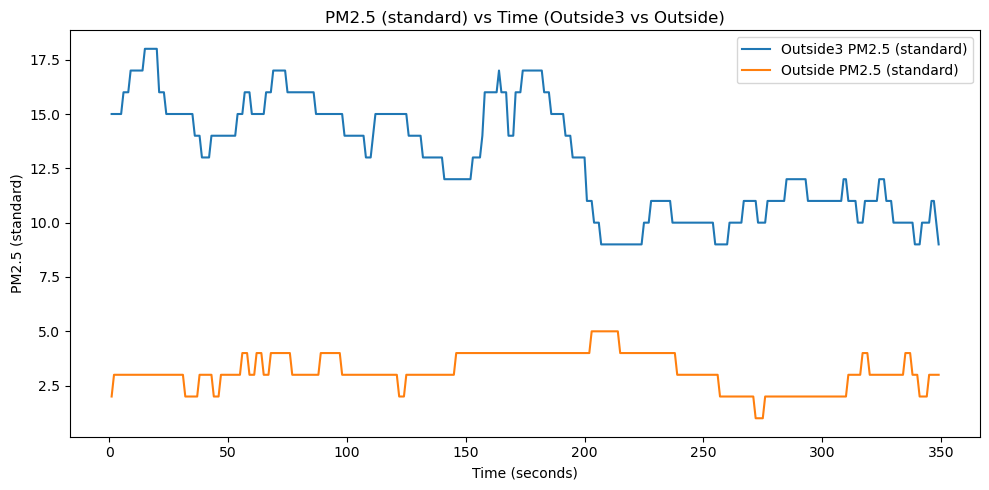

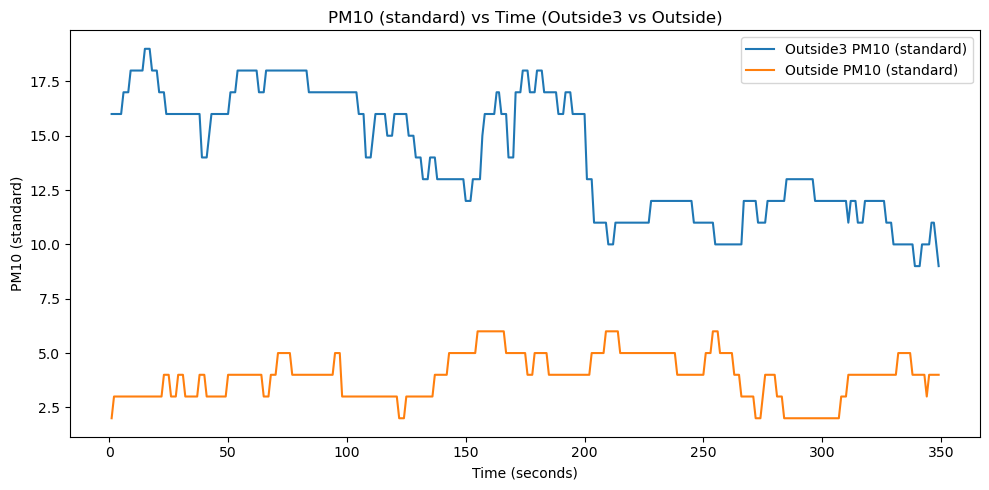

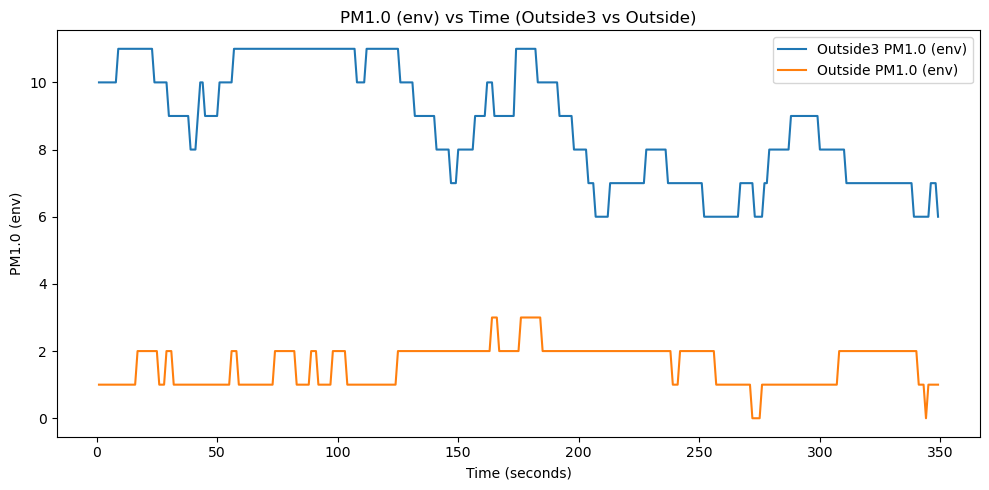

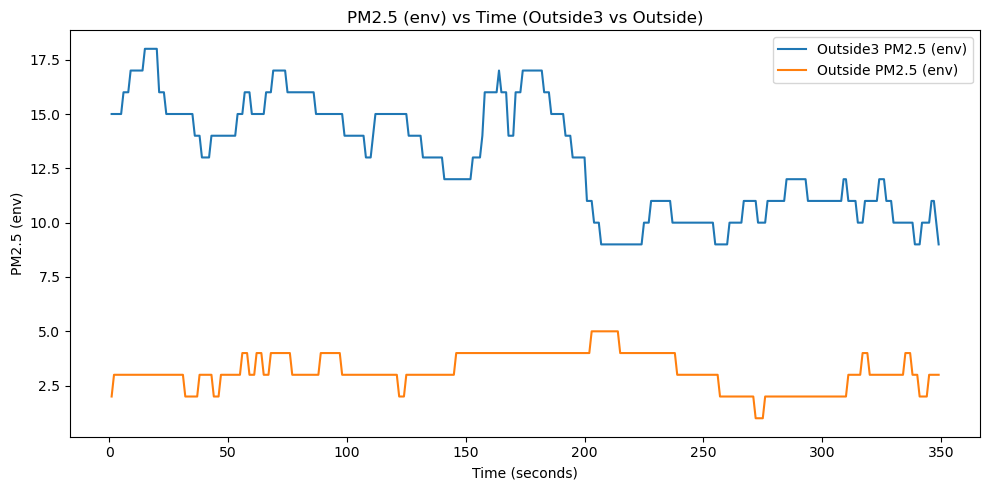

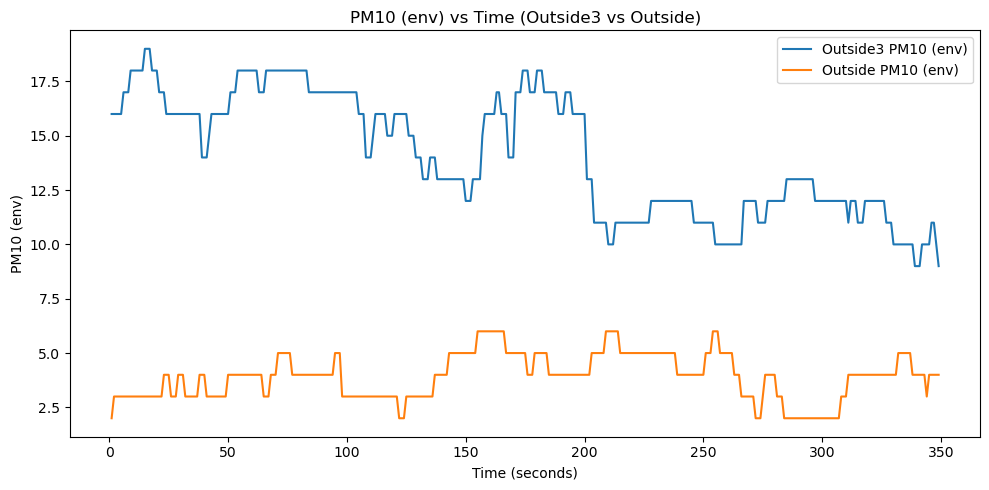

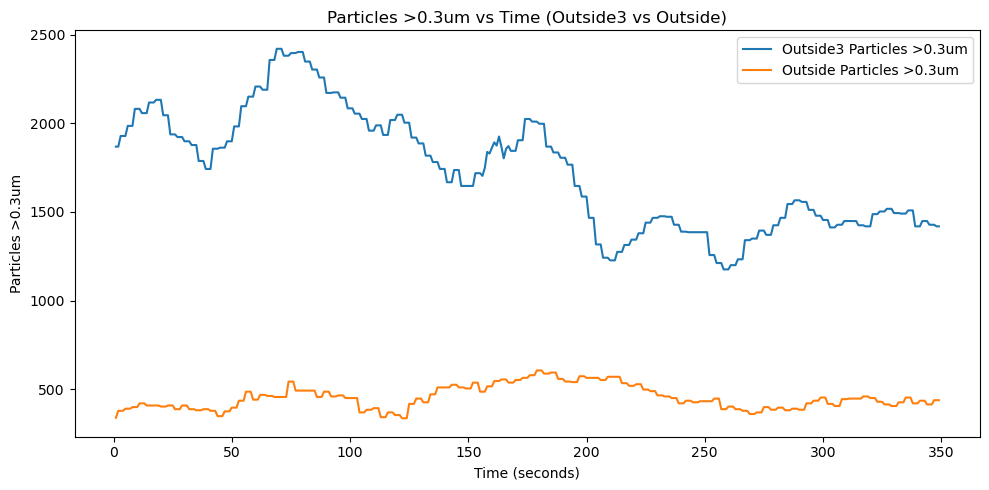

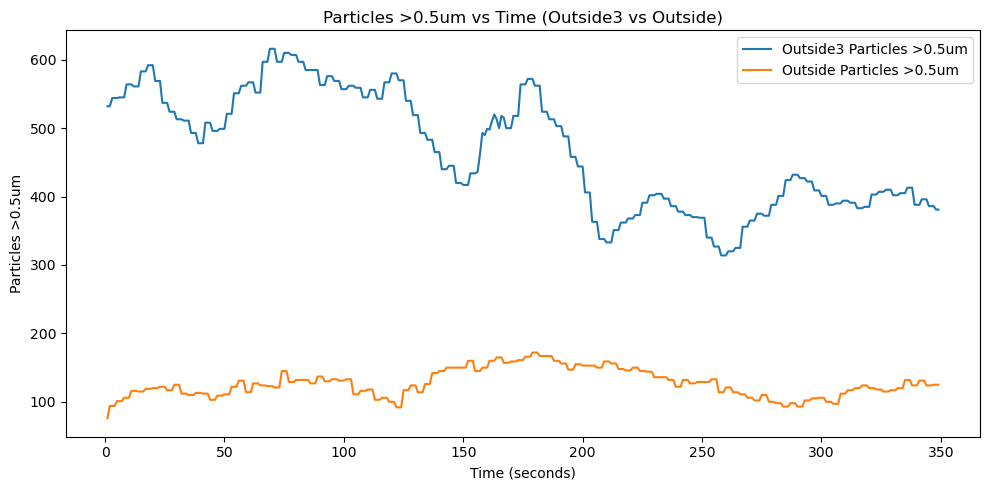

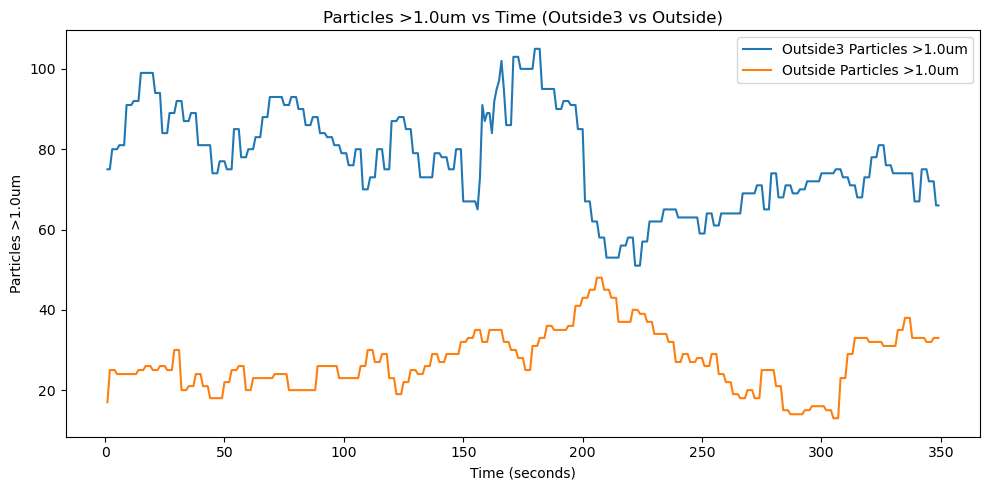

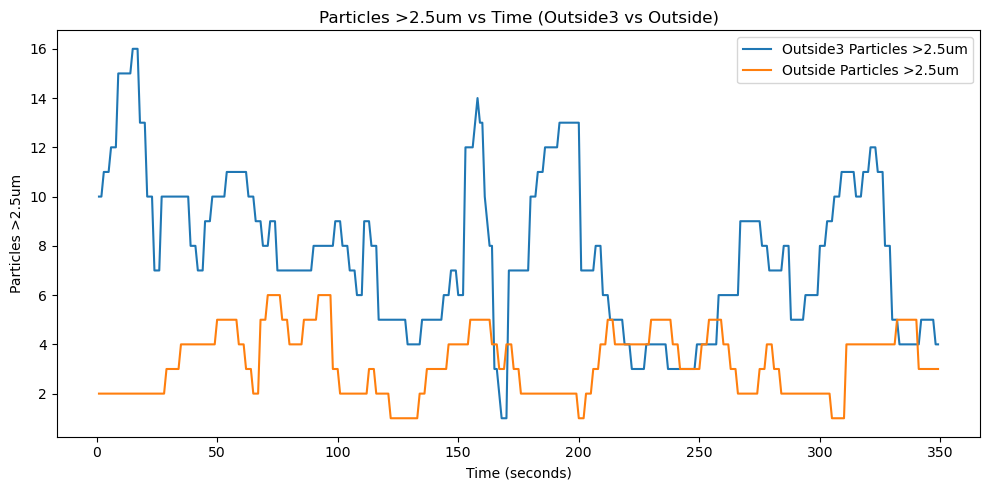

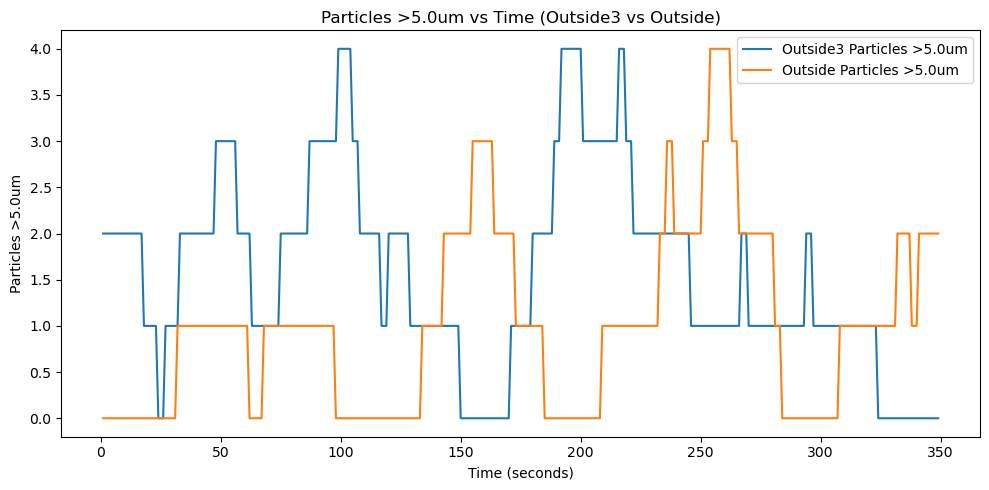

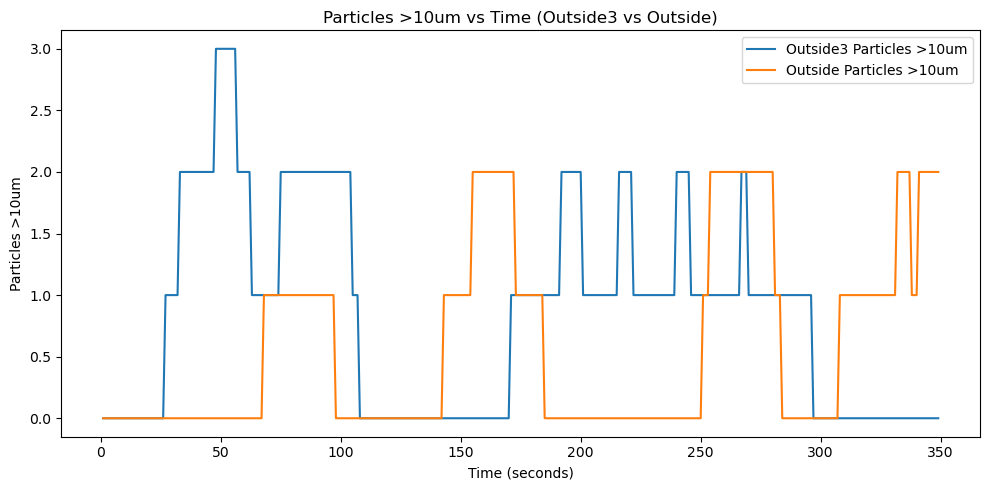

In [15]:
time_x_axis = np.arange(1, len(outside3) + 1)
sensor_columns = [col for col in outside3.columns if col.lower() != 'current time']

for sensor in sensor_columns:
    plt.figure(figsize=(10, 5))
    plt.plot(time_x_axis, outside3[sensor], label=f'Outside3 {sensor}')
    plt.plot(time_x_axis, outside[sensor], label=f'Outside {sensor}')
    plt.xlabel('Time (seconds)')
    plt.ylabel(sensor)
    plt.title(f'{sensor} vs Time (Outside3 vs Outside)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

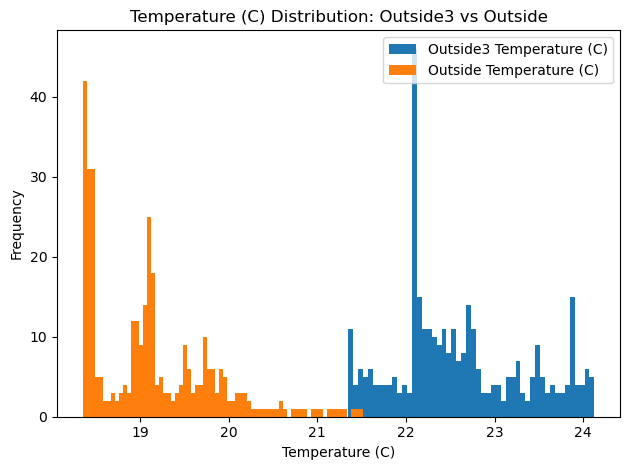

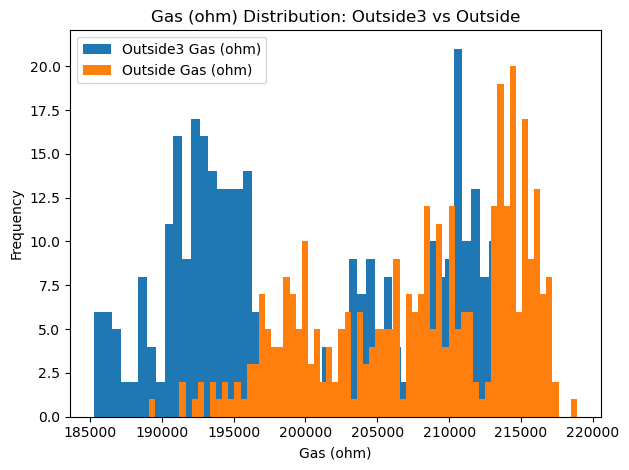

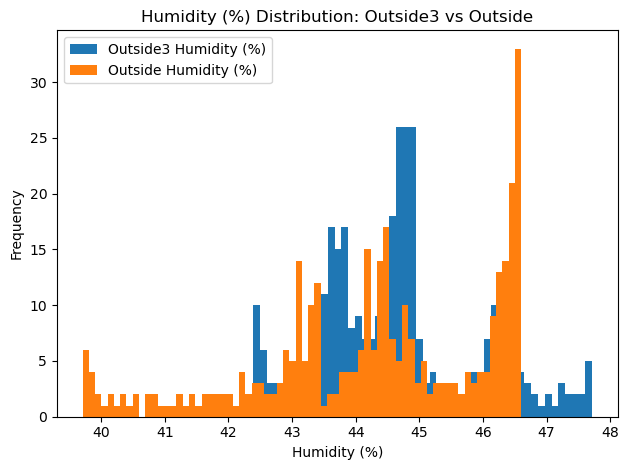

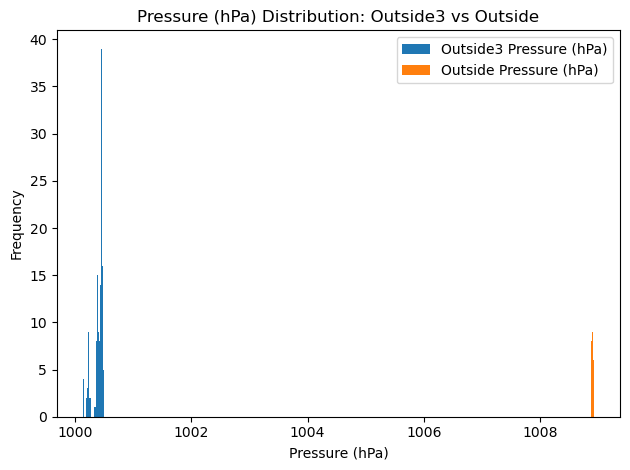

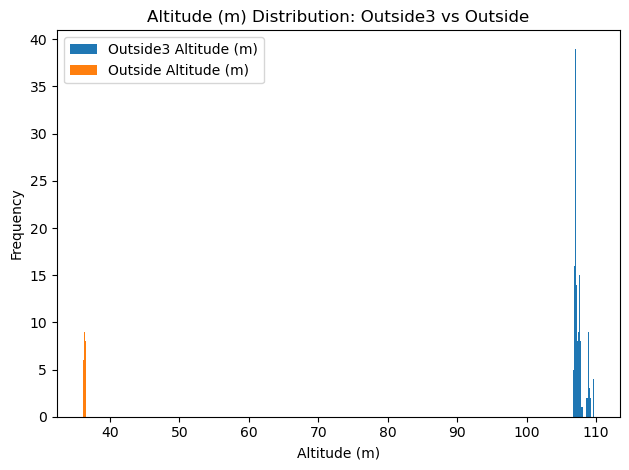

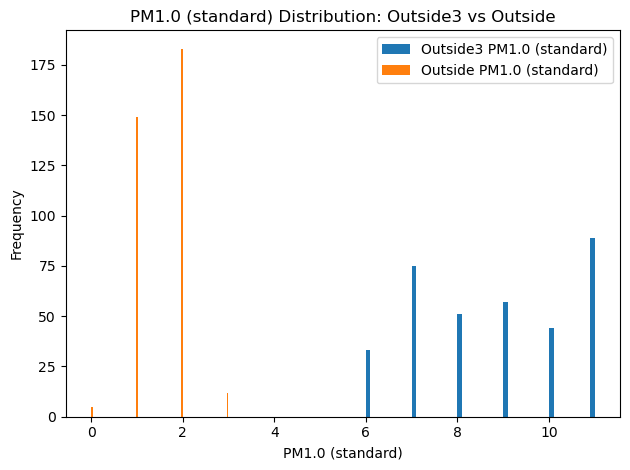

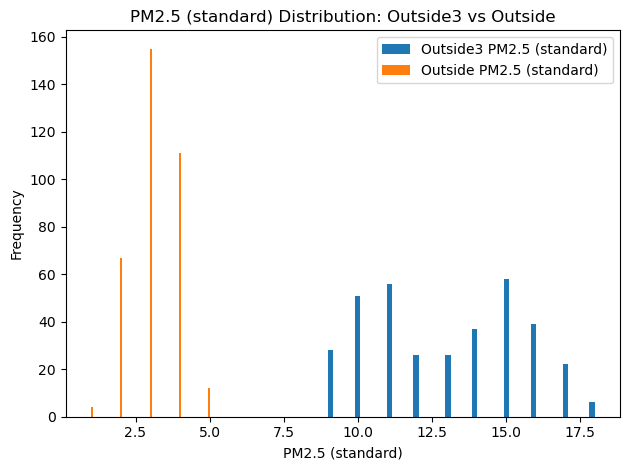

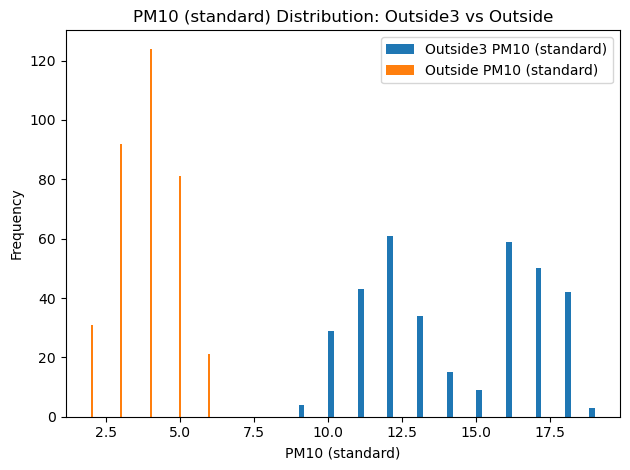

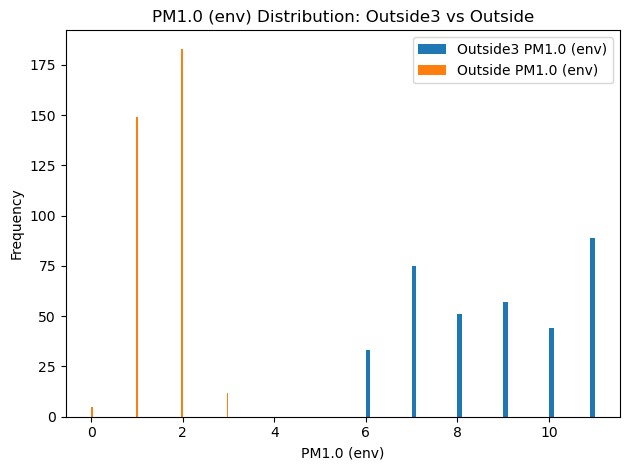

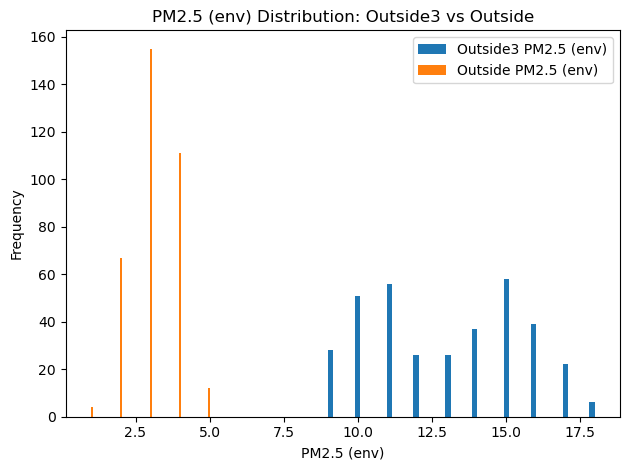

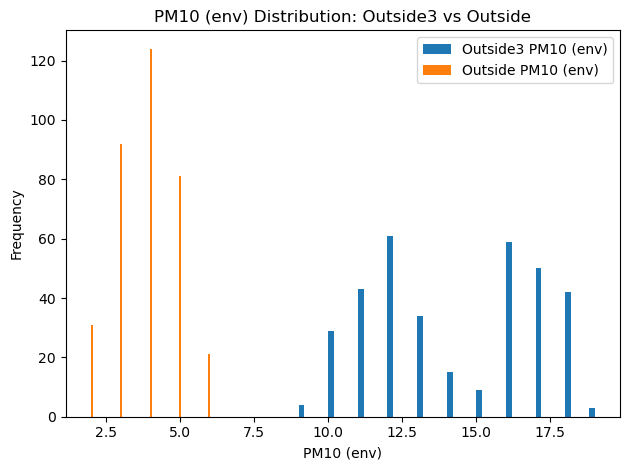

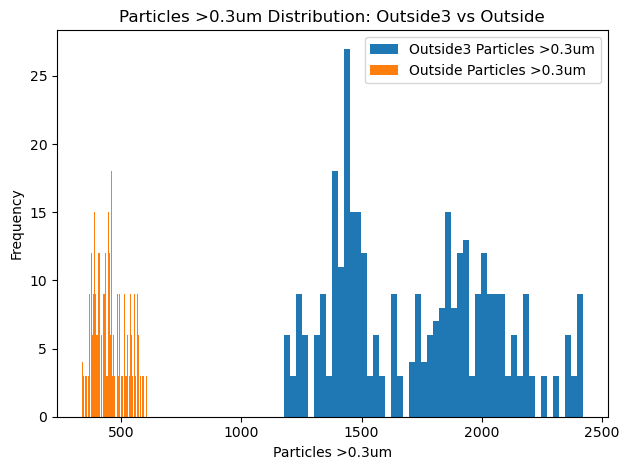

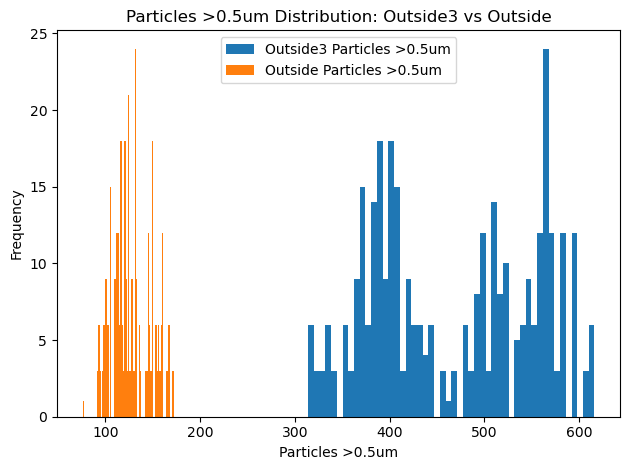

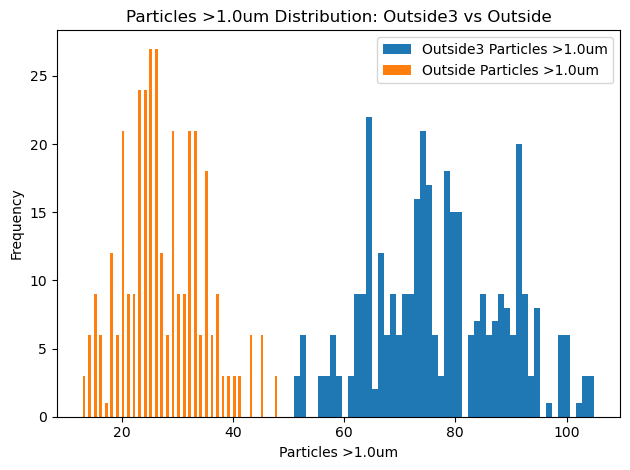

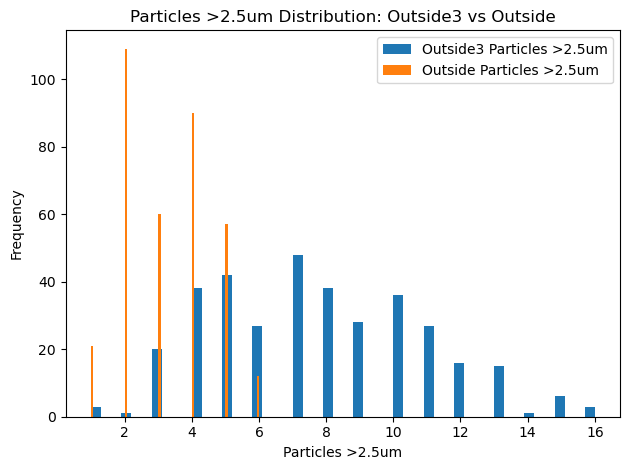

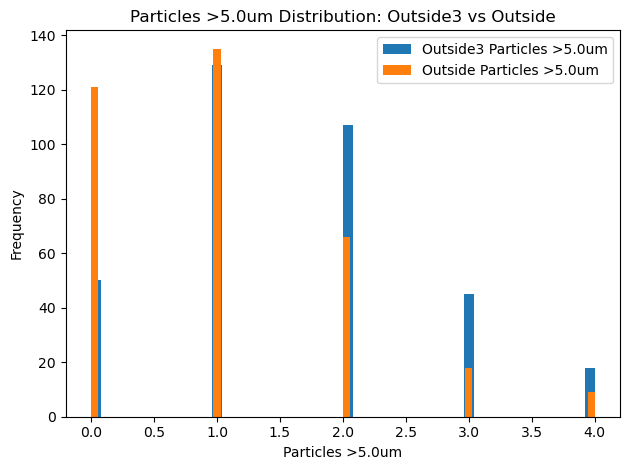

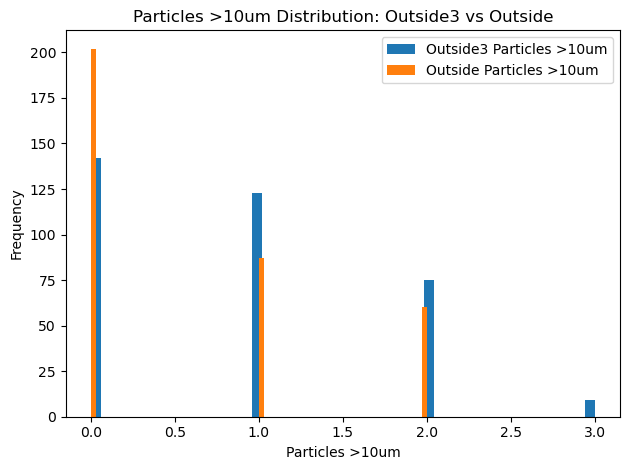

In [16]:
sensor_columns = [col for col in outside3.columns if col.lower() != 'current time']

for sensor in sensor_columns:
    outside3_data = outside3[sensor].dropna()
    outside_data = outside[sensor].dropna()

    plt.hist(outside3_data, bins=50,  label=f'Outside3 {sensor}')
    plt.hist(outside_data, bins=70,  label=f'Outside {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.title(f'{sensor} Distribution: Outside3 vs Outside')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [17]:
import pandas as pd
import numpy as np

outside = pd.read_csv('SensorsOutside.csv', skiprows=1)
outside3 = pd.read_csv('Sensors2.csv', skiprows=1)

excess_entries = len(outside) - len(outside3)
outside = outside.iloc[excess_entries:] 
outside = outside.iloc[30:]
outside3 = outside3.iloc[30:]


sensor_columns = [col for col in outside3.columns if col != outside3.columns[0]]

for sensor in sensor_columns:
    outside_data = outside[sensor].dropna()
    outside3_data = outside3[sensor].dropna()

    mu_out = np.mean(outside_data)
    mu_out3 = np.mean(outside3_data)
    
    sigma_out = np.std(outside_data, ddof=1)
    sigma_out3 = np.std(outside3_data, ddof=1)
    
    n_out = len(outside_data)
    n_out3 = len(outside3_data)
    
    SEM_out = sigma_out / np.sqrt(n_out)
    SEM_out3 = sigma_out3 / np.sqrt(n_out3)
    
    SE_delta = np.sqrt(SEM_out**2 + SEM_out3**2)
    
    delta = abs(mu_out - mu_out3)
    
    num_standard_devs = delta / SE_delta
    
    print(f"Sensor: {sensor}")
    print(f"Outside Mean: {mu_out:.2f}, Outside Std Dev: {sigma_out:.2f}, SEM: {SEM_out:.2f}")
    print(f"Outside3 Mean: {mu_out3:.2f}, Outside3 Std Dev: {sigma_out3:.2f}, SEM: {SEM_out3:.2f}")
    print(f"Difference in Means: {delta:.2f}, Combined Standard Error: {SE_delta:.2f}")
    print(f"Number of Standard Deviations between Means: {num_standard_devs:.2f}")
    
    if num_standard_devs > 3:
        print(f"For sensor {sensor}, the means are separated by more than 3σ; statistically significant difference.")
    else:
        print(f"For sensor {sensor}, the means are not separated by more than 3σ; no significant difference.")
    print("\n")


Sensor: Temperature (C)
Outside Mean: 18.99, Outside Std Dev: 0.53, SEM: 0.03
Outside3 Mean: 22.61, Outside3 Std Dev: 0.77, SEM: 0.04
Difference in Means: 3.63, Combined Standard Error: 0.05
Number of Standard Deviations between Means: 69.37
For sensor Temperature (C), the means are separated by more than 3σ; statistically significant difference.


Sensor: Gas (ohm)
Outside Mean: 209075.79, Outside Std Dev: 5899.82, SEM: 330.33
Outside3 Mean: 201309.88, Outside3 Std Dev: 8395.45, SEM: 470.05
Difference in Means: 7765.91, Combined Standard Error: 574.51
Number of Standard Deviations between Means: 13.52
For sensor Gas (ohm), the means are separated by more than 3σ; statistically significant difference.


Sensor: Humidity (%)
Outside Mean: 44.66, Outside Std Dev: 1.45, SEM: 0.08
Outside3 Mean: 44.69, Outside3 Std Dev: 1.26, SEM: 0.07
Difference in Means: 0.04, Combined Standard Error: 0.11
Number of Standard Deviations between Means: 0.36
For sensor Humidity (%), the means are not separa

# Step 4

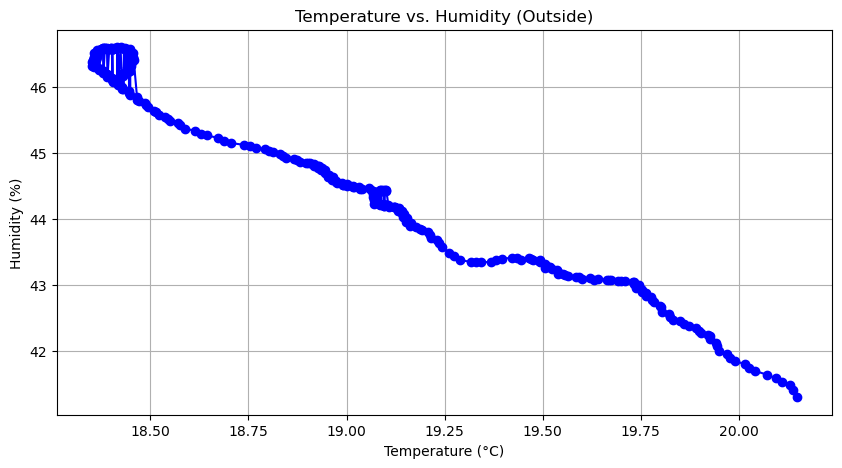

In [18]:
import matplotlib.pyplot as plt

temperature_col = "Temperature (C)"  
humidity_col = "Humidity (%)" 

outside_sorted = outside.sort_values(by=temperature_col)

plt.figure(figsize=(10, 5))
plt.plot(outside_sorted[temperature_col], outside_sorted[humidity_col], marker='o', linestyle='-', color='b')

plt.xlabel("Temperature (°C)")  
plt.ylabel("Humidity (%)")
plt.title("Temperature vs. Humidity (Outside)")
plt.grid(True)

plt.show()


The hidden vartiable to plot this is time, we have to grab the temperature and humidity data from a single time point, which is what this graph above does. Temperature and humidity are definitely negatively correlated, as the temperature increases the humidity drops. If we were to draw a line of best fit or us the Pearson Correlation, it would give a relatively accurate way to decribe the strength of the correlation as well as the direction. 

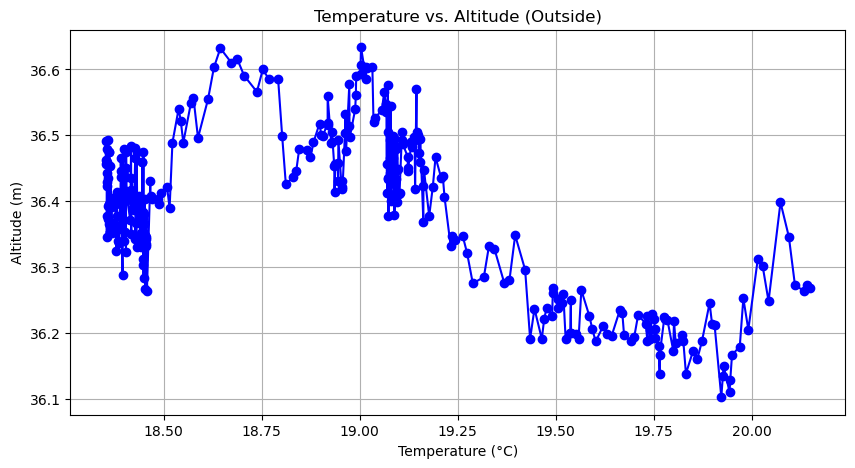

In [19]:
import matplotlib.pyplot as plt

temperature_col = "Temperature (C)"  
altitude_col = "Altitude (m)"  

outside_sorted = outside.sort_values(by=temperature_col)

plt.figure(figsize=(10, 5))
plt.plot(outside_sorted[temperature_col], outside_sorted[altitude_col], marker='o', linestyle='-', color='b')

plt.xlabel("Temperature (°C)")
plt.ylabel("Altitude (m)")
plt.title("Temperature vs. Altitude (Outside)")
plt.grid(True)

plt.show()


The correlation isn't quite the same, but there is a noticable drop in temperature as altitude increases. 

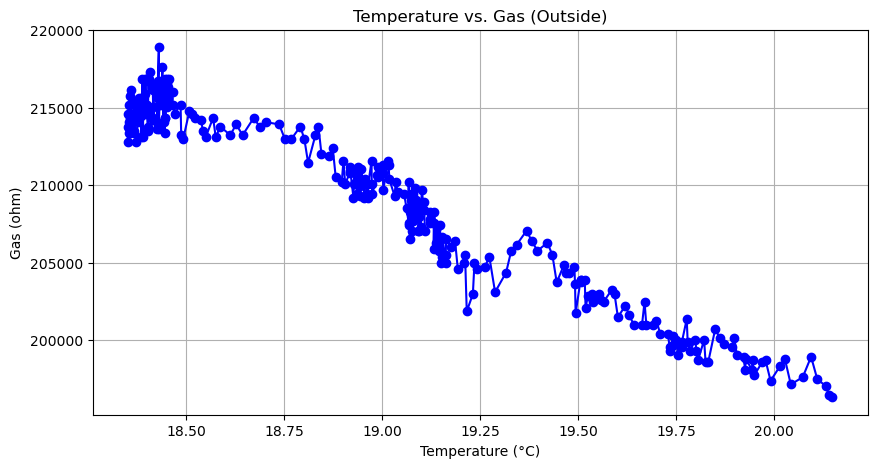

In [20]:
import matplotlib.pyplot as plt

temperature_col = "Temperature (C)"  
gas_col = "Gas (ohm)"  

outside_sorted = outside.sort_values(by=temperature_col)

plt.figure(figsize=(10, 5))
plt.plot(outside_sorted[temperature_col], outside_sorted[gas_col], marker='o', linestyle='-', color='b')

plt.xlabel("Temperature (°C)")
plt.ylabel("Gas (ohm)")
plt.title("Temperature vs. Gas (Outside)")
plt.grid(True)

plt.show()

Defiitely Negatively correlated. 

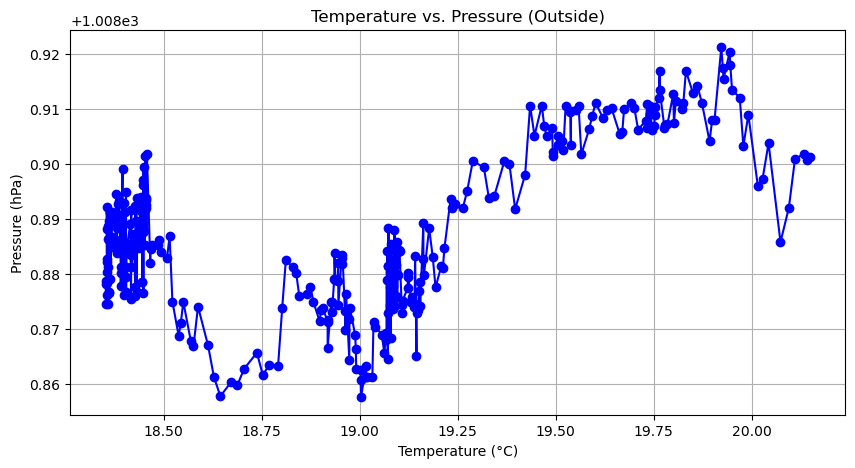

In [21]:
import matplotlib.pyplot as plt

temperature_col = "Temperature (C)"  
pressure_col = "Pressure (hPa)"  

outside_sorted = outside.sort_values(by=temperature_col)

plt.figure(figsize=(10, 5))
plt.plot(outside_sorted[temperature_col], outside_sorted[pressure_col], marker='o', linestyle='-', color='b')

plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (hPa)")
plt.title("Temperature vs. Pressure (Outside)")
plt.grid(True)

plt.show()

Not as strong of a correlation, the start has little correlation witht the rest of the data, but after 19 degrees there is a positive correlation. 

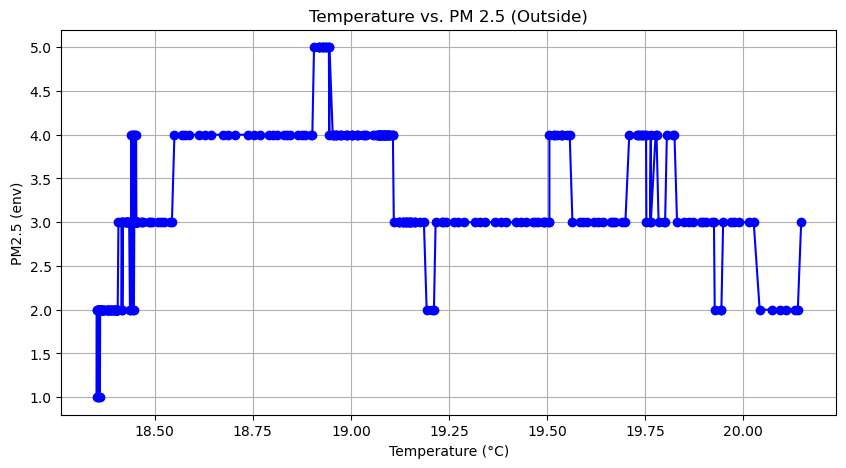

In [22]:
import matplotlib.pyplot as plt

temperature_col = "Temperature (C)"  
pm25_col = "PM2.5 (env)"  

outside_sorted = outside.sort_values(by=temperature_col)

plt.figure(figsize=(10, 5))
plt.plot(outside_sorted[temperature_col], outside_sorted[pm25_col], marker='o', linestyle='-', color='b')

plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (env)")
plt.title("Temperature vs. PM 2.5 (Outside)")
plt.grid(True)

plt.show()


Doesn't appear to be correalted, as the temperature increases the PM value doesn't change in a way that makes us see a correlation between the two properties. 